In [1]:
import os
import pandas as pd
import numpy as np

### Loading player data from filepath

In [2]:
# Loading Part
loaded_gameweek_dataframes = {}
load_path = "/Users/evgenigeorgiev/Documents/Jupyter Projects/FPL/player_dataframes"
for gw in range(1, 39):
    file_path = os.path.join(load_path, f'gw{gw}_players.csv')
    if os.path.exists(file_path):
        loaded_gameweek_dataframes[f'gw{gw}_df'] = pd.read_csv(file_path)
    else:
        loaded_gameweek_dataframes[f'gw{gw}_df'] = pd.DataFrame()
        print(f"No saved data found for Gameweek {gw}.")

# Loop through each gameweek number and create variables dynamically
for gw in range(1, 39):
    gw_key = f'gw{gw}_df'
    if gw_key in loaded_gameweek_dataframes:
        globals()[gw_key] = loaded_gameweek_dataframes[gw_key]
    else:
        print(f"No data available for {gw_key}.")


No saved data found for Gameweek 21.
No saved data found for Gameweek 22.
No saved data found for Gameweek 23.
No saved data found for Gameweek 24.
No saved data found for Gameweek 25.
No saved data found for Gameweek 26.
No saved data found for Gameweek 27.
No saved data found for Gameweek 28.
No saved data found for Gameweek 29.
No saved data found for Gameweek 30.
No saved data found for Gameweek 31.
No saved data found for Gameweek 32.
No saved data found for Gameweek 33.
No saved data found for Gameweek 34.
No saved data found for Gameweek 35.
No saved data found for Gameweek 36.
No saved data found for Gameweek 37.
No saved data found for Gameweek 38.


In [3]:
# Specify the directory and file name where the CSV file is saved
file_path = "/Users/evgenigeorgiev/Documents/Jupyter Projects/FPL/player_dataframes/player_ids.csv"

# Load the DataFrame from the CSV file
players_df = pd.read_csv(file_path)

players_df

,id,first_name,second_name,team_id,team_name,position_id,position
0,1,Folarin,Balogun,1,Arsenal,4,Forward
1,2,Cédric,Alves Soares,1,Arsenal,2,Defender
2,3,Mohamed,Elneny,1,Arsenal,3,Midfielder
3,4,Fábio,Ferreira Vieira,1,Arsenal,3,Midfielder
4,5,Gabriel,dos Santos Magalhães,1,Arsenal,2,Defender
...,...,...,...,...,...,...,...
766,768,Rhys,Bennett,14,Man Utd,2,Defender
767,769,Owen,Hesketh,20,Wolves,3,Midfielder
768,770,Ty,Barnett,20,Wolves,3,Midfielder
769,771,Micah,Hamilton,13,Man City,3,Midfielder


In [4]:
# Iterate through each gameweek key in the dictionary
for gw_key in loaded_gameweek_dataframes:
    # Add an empty 'first_name' column to the DataFrame
    loaded_gameweek_dataframes[gw_key]['first_name'] = ''
    # Add an empty 'second_name' column to the DataFrame
    loaded_gameweek_dataframes[gw_key]['second_name'] = ''

# Iterate through each gameweek DataFrame in the dictionary
for gw_key, gw_df in loaded_gameweek_dataframes.items():
    # Iterate over each row in the DataFrame
    for index, row in gw_df.iterrows():
        # Retrieve the player_id from the current row
        player_id = row['player_id']
        # Find the player in the players_df using the player_id
        player_info = players_df[players_df['id'] == player_id]
        # Check if the player was found in players_df
        if not player_info.empty:
            # Set the first name for the current row in the gameweek DataFrame
            loaded_gameweek_dataframes[gw_key].at[index, 'first_name'] = player_info.iloc[0]['first_name']
            # Set the second name for the current row in the gameweek DataFrame
            loaded_gameweek_dataframes[gw_key].at[index, 'second_name'] = player_info.iloc[0]['second_name']


In [5]:
# Assuming 'loaded_gameweek_dataframes' is a dictionary with keys for each gameweek
# like 'gw1_df', 'gw2_df', ..., 'gw38_df'. Each key maps to a DataFrame corresponding
# to player data for that particular gameweek.

# Step 1: Add empty columns for 'team_name' and 'team_id' to each gameweek DataFrame.
# This prepares the structure of each DataFrame for later data population.
for gw, df in loaded_gameweek_dataframes.items():
    df['team_name'] = ''  # Adding an empty column for team names
    df['team_id'] = 0     # Adding an empty column for team IDs (initialized with 0)

# Step 2 and 3: Iterate through each gameweek DataFrame and populate 'team_name' and 'team_id'.
for gw, df in loaded_gameweek_dataframes.items():
    # Iterating over each row in the current gameweek DataFrame
    for index, row in df.iterrows():
        # Finding the matching player in 'players_df' based on the first and second names.
        # The assumption here is that the combination of first and second names uniquely
        # identifies a player.
        player = players_df[(players_df['first_name'] == row['first_name']) & 
                            (players_df['second_name'] == row['second_name'])]

        if not player.empty:
            # If a matching player is found, update the 'team_name' and 'team_id' for that player
            # in the gameweek DataFrame.
            df.at[index, 'team_name'] = player.iloc[0]['team_name']  # Set the team name
            df.at[index, 'team_id'] = player.iloc[0]['team_id']     # Set the team ID



In [6]:
# Step 1: Add an empty column for 'position' to each gameweek DataFrame.
for gw, df in loaded_gameweek_dataframes.items():
    df['position'] = ''  # Adding an empty column for position

# Step 2: Iterate through each gameweek DataFrame and populate the 'position' column.
for gw, df in loaded_gameweek_dataframes.items():
    for index, row in df.iterrows():
        # Use player_id to find the matching player in 'players_df'.
        player_id = row['player_id']
        player = players_df[players_df['id'] == player_id]

        if not player.empty:
            # If a matching player is found, update the 'position' for that player
            # in the gameweek DataFrame.
            df.at[index, 'position'] = player.iloc[0]['position']  # Set the position

# Now, each DataFrame within loaded_gameweek_dataframes will have a 'position' column
# with the corresponding player's position.


In [7]:
list(loaded_gameweek_dataframes['gw1_df'])

['element',
 'fixture',
 'opponent_team',
 'total_points',
 'was_home',
 'kickoff_time',
 'team_h_score',
 'team_a_score',
 'round',
 'minutes',
 'goals_scored',
 'assists',
 'clean_sheets',
 'goals_conceded',
 'own_goals',
 'penalties_saved',
 'penalties_missed',
 'yellow_cards',
 'red_cards',
 'saves',
 'bonus',
 'bps',
 'influence',
 'creativity',
 'threat',
 'ict_index',
 'starts',
 'expected_goals',
 'expected_assists',
 'expected_goal_involvements',
 'expected_goals_conceded',
 'value',
 'transfers_balance',
 'selected',
 'transfers_in',
 'transfers_out',
 'player_id',
 'first_name',
 'second_name',
 'team_name',
 'team_id',
 'position']

In [8]:
loaded_gameweek_dataframes['gw1_df']

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,transfers_balance,selected,transfers_in,transfers_out,player_id,first_name,second_name,team_name,team_id,position
0,1,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,59090,0,0,1,Folarin,Balogun,Arsenal,1,Forward
1,2,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,29866,0,0,2,Cédric,Alves Soares,Arsenal,1,Defender
2,3,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,10880,0,0,3,Mohamed,Elneny,Arsenal,1,Midfielder
3,4,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,9548,0,0,4,Fábio,Ferreira Vieira,Arsenal,1,Midfielder
4,5,2,16,1,True,2023-08-12T12:00:00Z,2.0,1.0,1,4,...,0,2743150,0,0,5,Gabriel,dos Santos Magalhães,Arsenal,1,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,655,7,8,1,True,2023-08-12T14:00:00Z,0.0,1.0,1,3,...,0,0,0,0,655,Andre,Brooks,Sheffield Utd,17,Midfielder
654,656,7,8,1,True,2023-08-12T14:00:00Z,0.0,1.0,1,3,...,0,0,0,0,656,Antwoine,Hackford,Sheffield Utd,17,Forward
655,657,7,17,0,False,2023-08-12T14:00:00Z,0.0,1.0,1,0,...,0,0,0,0,657,Jesurun,Rak-Sakyi,Crystal Palace,8,Midfielder
656,658,7,17,0,False,2023-08-12T14:00:00Z,0.0,1.0,1,0,...,0,0,0,0,658,John-Kymani,Gordon,Crystal Palace,8,Forward


### What is the aim of this Project?

Player Performance Consistency Analysis
Goal: 
(i) Identify and visualize the most consistent FPL players. 
(ii) Create a metric best suited to identify such players.
(iii) Use K-means clustering to create groups of players with similar attributes. Use results to create a useful "scouting" tool for managers looking for a specific type of player.

Rough Steps that will be followed:

Step 1) Data Preparation:

* Aggregate player performance data across multiple gameweeks. Calculate key statistics per player: average points per game, standard deviation, minimum, and maximum points.

Step 2) Analysis:
    
* Create and explore different metrics for identifying high but also consistent performers. 

Step 3) Visualization:
* To understand our results more deeply.

Step 4) Machine Learning Application:
* Cluster Analysis: to create scouting tool.


### Step 1: Data Preperation and Exploration

In [9]:
# Step 1: Aggregate Data
# Concatenate all non-empty DataFrames in loaded_gameweek_dataframes
all_gameweeks_df = pd.concat([df for df in loaded_gameweek_dataframes.values() if not df.empty], ignore_index=True)

# Step 2: Calculate Key Statistics with Position Segmentation
# Group the data by player and calculate various statistics
player_stats = all_gameweeks_df.groupby(['player_id', 'first_name', 'second_name', 'position']).agg(
    total_points=('total_points', 'sum'),
    total_goals=('goals_scored', 'sum'),
    total_assists=('assists', 'sum'),
    total_clean_sheets=('clean_sheets', 'sum'),
    total_bonus=('bonus', 'sum'),
    total_minutes_played=('minutes', 'sum')
).reset_index()

# Calculate appearances as total minutes played divided by 90 (mins in a game)
player_stats['appearances'] = (player_stats['total_minutes_played'] / 90).round(1)

# Calculate average points and bonus per actual appearance
player_stats['average_points'] = player_stats['total_points'] / player_stats['appearances']
player_stats['average_bonus'] = player_stats['total_bonus'] / player_stats['appearances']

# Calculate standard deviation of points per game based on actual appearances
player_stats['std_dev_points'] = all_gameweeks_df.groupby(['player_id', 'position'])['total_points'].apply(lambda x: x[x > 0].std()).reset_index(drop=True)

# Step 3: Get the most recent price for each player
latest_price = all_gameweeks_df.groupby('player_id')['value'].apply(lambda x: x.dropna().iloc[-1] if not x.dropna().empty else None).reset_index()
player_stats = player_stats.merge(latest_price, on='player_id', how='left')
player_stats['latest_price'] = player_stats['value'] / 10
player_stats.drop(columns=['value'], inplace=True)

# Step 4: Function to calculate downside deviation
def downside_deviation(series, mean):
    negative_deviations = [(p - mean) ** 2 for p in series if p < mean]
    return np.sqrt(sum(negative_deviations) / len(negative_deviations)) if negative_deviations else np.nan

# Adding Downside Deviation to player_stats
downside_dev = all_gameweeks_df.groupby(['player_id'])['total_points'].apply(lambda x: downside_deviation(x, x.mean()))
player_stats = player_stats.merge(downside_dev.rename('downside_deviation'), on='player_id', how='left')


# Step 5: Clean Data
# Remove rows where the standard deviation is not a number or latest price is empty
#player_stats = player_stats.dropna(subset=['std_dev_points', 'latest_price'])

# Additional cleaning steps can be added here if necessary

# Displaying the first few rows of the data
player_stats


,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,appearances,average_points,average_bonus,std_dev_points,latest_price,downside_deviation
0,1,Folarin,Balogun,Forward,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.4,NaN
1,2,Cédric,Alves Soares,Defender,0,0,0,0,0,0,0.0,NaN,NaN,NaN,3.9,NaN
2,3,Mohamed,Elneny,Midfielder,4,0,1,0,0,1,0.0,inf,NaN,NaN,4.4,0.200000
3,4,Fábio,Ferreira Vieira,Midfielder,21,1,3,1,0,236,2.6,8.076923,0.000000,2.497618,5.4,1.186908
4,5,Gabriel,dos Santos Magalhães,Defender,57,1,0,5,4,1374,15.3,3.725490,0.261438,2.871001,5.0,1.861547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,768,Rhys,Bennett,Defender,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.0,NaN
767,769,Owen,Hesketh,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN
768,770,Ty,Barnett,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN
769,771,Micah,Hamilton,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN


In [10]:
player_stats.iloc[307]

player_id                      308
first_name                 Mohamed
second_name                  Salah
position                Midfielder
total_points                   140
total_goals                     12
total_assists                    7
total_clean_sheets               7
total_bonus                     18
total_minutes_played          1650
appearances                   18.3
average_points            7.650273
average_bonus             0.983607
std_dev_points            4.763408
latest_price                  13.3
downside_deviation        4.022663
Name: 307, dtype: object

### Step 2: Analysis:

### Mean Adjusted Conistency Index (MACI)

Goal: Identify players who consistently score high points. 

Formula: $MACI = \frac{\text{Average Points}}{\sqrt{\text{Standard Deviation of Points}}}$

Theory: Higher standard deviation reflects higher variability from the mean. So by penalising high variablity, we reward consistent performers.

<b><span style="color: red;">Please note that when you set min_appearances and min_avg_points you filter out all players below these thresholds for the remainder of the project. For our purposes I think this makes sense. There is no need to waste time and resource on inconsistent and low scoring players.</span></b>


In [11]:
from IPython.display import display

# Assuming 'player_stats' DataFrame is already defined

# Step 1: Filter Out Players with Insufficient Data and Below Minimum Average Points
min_appearances = 10
min_avg_points = 3  # Set this to the desired threshold
filtered_player_stats = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                     (player_stats['average_points'] >= min_avg_points)].copy()

# Step 2: Calculate the Adjusted Consistency Index
# Formula: Average Points / sqrt(Standard Deviation of Points)
filtered_player_stats['MACI'] = filtered_player_stats['average_points'] / np.sqrt(filtered_player_stats['std_dev_points'].replace(0, np.nan))

# Step 3: Calculate Mean Adjusted Consistency Index by Position
# This gives an idea of which positions tend to have more consistent performers
position_mean_adjusted_consistency = filtered_player_stats.groupby('position')['MACI'].mean()

# Step 4: Correlation Analysis
# Examines relationships between different variables (e.g., how total goals correlate with total points)
correlation_matrix = filtered_player_stats[['total_points', 'total_goals', 'total_assists', 'total_clean_sheets', 'total_bonus', 'average_bonus']].corr()

# Step 5: Identifying Top Consistent Performers
# Sorting by adjusted consistency index to find top performers
maci_scores = filtered_player_stats
top_performers_adjusted = filtered_player_stats.sort_values(by='MACI', ascending=False).head(10)

# Display Results
# print("Mean Adjusted Consistency Index by Position:")
# display(position_mean_adjusted_consistency.reset_index())

# print("\nCorrelation Matrix:")
# display(correlation_matrix)

print("\nTop 10 Consistent Performers with MACI Index:")
display(top_performers_adjusted[['first_name', 'second_name', 'position', 'latest_price', 'average_points', 'std_dev_points', 'MACI']])


Top 10 Consistent Performers with MACI Index:


,first_name,second_name,position,latest_price,average_points,std_dev_points,MACI
307,Mohamed,Salah,Midfielder,13.3,7.650273,4.763408,3.505242
292,Darwin,Núñez Ribeiro,Forward,7.5,6.206897,3.343123,3.394676
525,Jarrod,Bowen,Midfielder,7.9,6.000000,3.162278,3.374048
105,Mathias,Jensen,Midfielder,5.4,5.728155,3.044541,3.282871
687,Mohammed,Kudus,Midfielder,6.9,7.102804,4.837355,3.229430
556,Hwang,Hee-chan,Midfielder,5.7,6.225166,3.733835,3.221613
18,Bukayo,Saka,Midfielder,9.0,5.714286,3.257972,3.165835
354,Erling,Haaland,Forward,13.9,7.777778,6.045857,3.163200
361,Cole,Palmer,Midfielder,5.6,7.142857,5.241239,3.120003
352,Phil,Foden,Midfielder,7.7,5.316456,2.990180,3.074493


Comments on results:
- metric offers interesting insights, intriguing to see players like Nunez scoring highly.
- "consistency" should be taken with a pinch of salt. Standard deviation is imperfect measure of "consistency". Sample size is small and it penalises very high score performances as well as very low performances (not ideal).
- player price not incorporated to this metric. Players like Salah score highly, but are they best for what you pay? 

### Value Adjusted Consistency Index (VACI)

Goal: Evaluate players' consistency relative to their price.

Formula: $VACI = \frac{\text{Average Points}^2}{\sqrt{\text{Standard Deviation of Points}} \times \sqrt{\text{Latest Price}}}$

Interpretation: Higher VACI values suggest a player is consistently high-scoring and offers good value for their price.

In [12]:
# Filter out players based on minimum appearances and average points
filtered_player_stats = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                     (player_stats['average_points'] >= min_avg_points)].copy()

# Revised VACI calculation with filtered data
#filtered_player_stats['VACI'] = (filtered_player_stats['average_points'] ** 2) / (np.sqrt(filtered_player_stats['std_dev_points'].replace(0, np.nan)) * filtered_player_stats['latest_price'])
filtered_player_stats['VACI'] = (filtered_player_stats['average_points'] ** 2) / (np.sqrt(filtered_player_stats['std_dev_points'].replace(0, np.nan)) * np.sqrt(filtered_player_stats['latest_price'].replace(0, np.nan)))


# Handle potential NaN and infinite values
filtered_player_stats.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filter out players with NaN VACI (due to insufficient data or other reasons)
vaci_scores = filtered_player_stats
filtered_player_stats = filtered_player_stats.dropna(subset=['VACI'])

# Display players with the highest revised VACI scores
top_value_players_revised = filtered_player_stats.sort_values(by='VACI', ascending=False).head(10)
print("Top 10 Players Based on Revised VACI (with Filters):")
display(top_value_players_revised[['first_name', 'second_name', 'position', 'average_points', 'std_dev_points', 'latest_price', 'VACI']])


Top 10 Players Based on Revised VACI (with Filters):


,first_name,second_name,position,average_points,std_dev_points,latest_price,VACI
361,Cole,Palmer,Midfielder,7.142857,5.241239,5.6,9.417441
687,Mohammed,Kudus,Midfielder,7.102804,4.837355,6.9,8.732350
556,Hwang,Hee-chan,Midfielder,6.225166,3.733835,5.7,8.400146
105,Mathias,Jensen,Midfielder,5.728155,3.044541,5.4,8.092296
292,Darwin,Núñez Ribeiro,Forward,6.206897,3.343123,7.5,7.693823
307,Mohamed,Salah,Midfielder,7.650273,4.763408,13.3,7.353078
134,João Pedro,Junqueira de Jesus,Forward,5.948276,4.341997,5.4,7.307024
525,Jarrod,Bowen,Midfielder,6.000000,3.162278,7.9,7.202594
598,Moussa,Diaby,Midfielder,5.820896,3.603929,6.6,6.947356
414,Alexander,Isak,Forward,6.226415,4.177385,7.6,6.880454


Comments on results:
- As expected, players with high price penalised. Offers an interesting alternative lense through which to analyse player performance.
- Useful to analyse results in conjunction with MACI metric.
- The same problems with standard deviation as a metric of "consistency" persist. Continue to view results within context.

### Improving the metrics by replacing std deviation with downside deviation...

Downside Deviation is a risk measure that focuses specifically on returns that fall below a minimum threshold or target (such as the mean or average return). It's a useful statistic in contexts where only downside variance is of concern, rather than overall variability.

- **Goal:** Measure the extent to which a player's performance (in terms of points scored) falls below their average performance.
- **Formula:** 
  - Let \( \mu \) be the average points scored by a player.
  - For each game, calculate \( (\text{points scored} - \mu) \) if the points scored are less than \( \mu \), otherwise count it as zero.
  - The Downside Deviation is then the square root of the average of these squared differences.
  - In formula terms:
    $$
    \text{Downside Deviation} = \sqrt{\frac{\sum_{i=1}^{n} \max(\mu - \text{points}_i, 0)^2}{n}}
    $$
    where \( n \) is the number of games.

- **Interpretation:** A higher Downside Deviation indicates greater inconsistency with more frequent and severe underperformance relative to the average. A lower Downside Deviation suggests more consistent performance with fewer and less severe drops below the average.


### DDACI (Downside Deviation Adjusted Consistency Index)

Goal: Measure consistency considering only negative deviations from the average.

Formula: $DDACI = \frac{\text{Average Points}}{\sqrt[3]{\text{Downside Deviation}}}$

Interpretation: Focuses on penalizing players who frequently score below their average, thus rewarding consistently high scorers.

In [13]:
# Filter out players based on minimum appearances and average points
filtered_player_stats_ddaci = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                           (player_stats['average_points'] >= min_avg_points)].copy()

# Calculate the Downside Deviation Adjusted Consistency Index (DDACI)
filtered_player_stats_ddaci['DDACI'] = filtered_player_stats_ddaci['average_points'] / np.cbrt(filtered_player_stats_ddaci['downside_deviation'].replace(0, np.nan))

# Display top performers based on DDACI
top_performers_ddaci = filtered_player_stats_ddaci.sort_values(by='DDACI', ascending=False).head(10)
print("Top 10 Performers Based on DDACI:")
display(top_performers_ddaci[['first_name', 'second_name', 'position', 'average_points', 'downside_deviation','latest_price', 'DDACI']])


Top 10 Performers Based on DDACI:


,first_name,second_name,position,average_points,downside_deviation,latest_price,DDACI
307,Mohamed,Salah,Midfielder,7.650273,4.022663,13.3,4.810303
687,Mohammed,Kudus,Midfielder,7.102804,3.284554,6.9,4.778273
361,Cole,Palmer,Midfielder,7.142857,3.640055,5.6,4.643399
354,Erling,Haaland,Forward,7.777778,4.766719,13.9,4.621494
414,Alexander,Isak,Forward,6.226415,2.479343,7.6,4.600367
292,Darwin,Núñez Ribeiro,Forward,6.206897,2.491987,7.5,4.578177
134,João Pedro,Junqueira de Jesus,Forward,5.948276,2.274627,5.4,4.522942
515,Son,Heung-min,Midfielder,7.134831,4.166033,9.9,4.434141
131,Evan,Ferguson,Forward,5.384615,1.814754,5.9,4.414506
598,Moussa,Diaby,Midfielder,5.820896,2.309346,6.6,4.403792


Comments on results:
- Metric seems less averse to high average point scorers than, understandably - as we no longer penalise deviations above the mean.
- Regardless downside deviation is still an imperfect metric in an FPL context. Given the small sample size, any intepretations "around consistency" should be taken with a pinch of salt.

### DDAVACI (Downside Deviation Adjusted Value Adjusted Consistency Index)

Goal: Assess player consistency and value, taking into account only downside deviations.

Formula: $DDAVACI = \frac{\text{Average Points}^2}{\sqrt[3]{\text{Downside Deviation}} \times \sqrt{\text{Latest Price}}}$

Interpretation: Combines the value aspect with a focus on consistency in performance, penalizing players more for underperforming relative to their average.

In [14]:
# Filter out players based on minimum appearances and average points
filtered_player_stats_ddavaci = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                             (player_stats['average_points'] >= min_avg_points)].copy()

# Calculate the Downside Deviation Adjusted Value Adjusted Consistency Index (DDAVACI)
#filtered_player_stats_ddavaci['DDAVACI'] = (filtered_player_stats_ddavaci['average_points'] ** 2) / (np.cbrt(filtered_player_stats_ddavaci['downside_deviation'].replace(0, np.nan)) * filtered_player_stats_ddavaci['latest_price'])
filtered_player_stats_ddavaci['DDAVACI'] = (filtered_player_stats_ddavaci['average_points'] ** 2) / (np.cbrt(filtered_player_stats_ddavaci['downside_deviation'].replace(0, np.nan)) * np.sqrt(filtered_player_stats_ddavaci['latest_price'].replace(0, np.nan)))

# Display top performers based on DDAVACI
top_value_players_ddavaci = filtered_player_stats_ddavaci.sort_values(by='DDAVACI', ascending=False).head(10)
print("Top 10 Players Based on DDAVACI:")
display(top_value_players_ddavaci[['first_name', 'second_name', 'position', 'average_points', 'downside_deviation', 'latest_price', 'DDAVACI']])


Top 10 Players Based on DDAVACI:


,first_name,second_name,position,average_points,downside_deviation,latest_price,DDAVACI
361,Cole,Palmer,Midfielder,7.142857,3.640055,5.6,14.015672
687,Mohammed,Kudus,Midfielder,7.102804,3.284554,6.9,12.920409
134,João Pedro,Junqueira de Jesus,Forward,5.948276,2.274627,5.4,11.577512
556,Hwang,Hee-chan,Midfielder,6.225166,3.263434,5.7,10.943077
105,Mathias,Jensen,Midfielder,5.728155,2.252966,5.4,10.770796
391,Scott,McTominay,Midfielder,5.338983,1.883090,4.8,10.535927
414,Alexander,Isak,Forward,6.226415,2.479343,7.6,10.390197
292,Darwin,Núñez Ribeiro,Forward,6.206897,2.491987,7.5,10.376155
307,Mohamed,Salah,Midfielder,7.650273,4.022663,13.3,10.090752
515,Son,Heung-min,Midfielder,7.134831,4.166033,9.9,10.054850


Comments on results:
- Seems to strongly penalise expensive players. Regarldess, an interesting lense through which to view performance.
- Suffers from same drawbacks as DDACI, due to downside deviation.

### A final metric...


Aim: devise a metric that is better suited to the FPL context. 

Etc: consider two players with the following performances:

Player 1: 4, 4, 4, 4, 4, 4, 4, 4, 4 (mean = 4) & 
Player 2: 4, 10, 4, 4, 4, 4, 4, 10, 4 (mean = 5.33)

- Our metrics are designed to reward high average points. So it may be the case that Player 2 ranks higher in our metrics, BUT...

- both standard deviation and downside deviation metrics will apply a penalty to player 2, since on 9/9 occurences there is a deviation from the mean and on 7/9 occurences a downside deviation from the mean.

- on the other hand player 1 exhibits 0/9 deviations from the mean. so neither standard nor downside deviation apply a penalty to this player.

- But is "player 2" really less consistent than "player 1"? Both score atleast 4 points a game, but player 2 sometimes scores more. 

- I want to devise a metric that better handles this kind of scenario.


In [15]:
import numpy as np
import pandas as pd

# PARAMETERS - Adjustable by user
alpha = 0            # Penalty weight
ap_scale = 1         # Scaling factor for average points
ap_power = 3         # Exponent for average points
price_scale = 1      # Scaling factor for latest price
price_power = 0.5      # Exponent for latest price
X = 4                # Underperformance threshold (for a full 90 minutes game)
full_game_minutes = 90  # Duration of a full game in minutes


In [16]:
latex_formula = r"""$
\text{{New Metric}} = \frac{{ {ap_scale} \times \text{{AP}}^{{{ap_power}}}}}{{ {price_scale} \times \text{{P}}^{{{price_power}}}}} \times (1 - \times \frac{{\text{{PU}}}}{{\text{{Total Game Weeks}}}})
$""".format(
    ap_scale=ap_scale,
    ap_power=ap_power,
    price_scale=price_scale,
    price_power=price_power,
    alpha=alpha
)

# Display the formula
from IPython.display import display, Math
display(Math(latex_formula))





<IPython.core.display.Math object>

Comments on new metric: 
- First part of the formula is similar to previous metrics i.e. average points / price of the player. Same intuition, we want to reward high scorers, but also take into account the price you pay for the points
- We introduce a "penalty_factor" = 1 minus ("PU" i.e. number of gameweeks player underperforms / number of appearances)
- PU is calculated as follows: given some underperformance threshold X (etc: X=4), we count an appearance on a particular gameweek as an "underperformance" if the player scores below 4 points in that game.
- Note: we will adjust X to reflect the minutes a player plays in a game. i.e. if X = 4 but the player only plays 45mins/90mins, then the underperformance threshold X will be set to X = 4 * (45/90) = 2 points.

Intuition: we now define "consistency" as gameweeks where a player performs above a certain minimum threshold. This metric will no longer penalise very volatile players with otherwise high scoring performances.

Precautions: 
- there is an arbitrary element to setting the threshold. in FPL context X=4 makes good sense, since you often only need to play a full game and not do much else to score 1,2 or 3 points. Often 4+ points is a sign a player has got a clean sheet, assist, goal etc.
- it would make sense to delve deeper into how to best set X, but for simplicity we will stick to X=4. It should offer a good enough platform for valuable and interesting insights.
- ultimately, this way we better define what we mean by "consistent performers" i.e. players who consistently score goals, provide assists, or keep clean sheets.


### Building the new "Alpha Metric"

In [17]:

# Assuming player_stats and loaded_gameweek_dataframes are available
# Add your data loading logic here

# Filter out players based on minimum appearances and average points
filtered_player_stats = player_stats[(player_stats['appearances'] >= min_appearances) &
                                     (player_stats['average_points'] >= min_avg_points)].copy()

# Initialize a column for weekly points
filtered_player_stats['weekly_points'] = [[] for _ in range(len(filtered_player_stats))]
filtered_player_stats['minutes_played'] = [[] for _ in range(len(filtered_player_stats))]

# Iterate over each gameweek and accumulate points and minutes for each player
for gw, gw_df in loaded_gameweek_dataframes.items():
    if not gw_df.empty:  # Check if the DataFrame is not empty
        for idx, row in filtered_player_stats.iterrows():
            player_id = row['player_id']  # Replace with the correct column name if needed
            player_gw_data = gw_df[gw_df['player_id'] == player_id]
            if not player_gw_data.empty:
                total_points = player_gw_data['total_points'].sum()
                minutes = player_gw_data['minutes'].sum()
                filtered_player_stats.at[idx, 'weekly_points'].append(total_points)
                filtered_player_stats.at[idx, 'minutes_played'].append(minutes)

# Calculate underperformance count based on scaled minutes
def calculate_underperformance(row):
    scaled_underperformance = 0
    for points, minutes in zip(row['weekly_points'], row['minutes_played']):
        scaled_X = X * (minutes / full_game_minutes)  # Scale X based on minutes played
        if points < scaled_X:
            scaled_underperformance += 1
    return scaled_underperformance

filtered_player_stats['underperformance_count'] = filtered_player_stats.apply(calculate_underperformance, axis=1)

# Calculate Penalty Factor
filtered_player_stats['penalty_factor'] = 1 - (filtered_player_stats['underperformance_count'] / filtered_player_stats['appearances'])

# Calculate New Metric
filtered_player_stats['Alpha_Metric'] = (ap_scale * (filtered_player_stats['average_points'] ** ap_power)) / \
                                        (price_scale * (filtered_player_stats['latest_price'] ** price_power)) * \
                                        filtered_player_stats['penalty_factor']
alpha_scores = filtered_player_stats

# Handle potential NaN and infinite values
filtered_player_stats.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filter out players with NaN New Metric (due to insufficient data or other reasons)
filtered_player_stats = filtered_player_stats.dropna(subset=['Alpha_Metric'])



# Display players with the highest new metric scores
top_value_players_alpha_metric = filtered_player_stats.sort_values(by='Alpha_Metric', ascending=False).head(10)
print("Top 10 Players Based on New Alpha Metric (with Filters):")
display(top_value_players_alpha_metric[['first_name', 'second_name', 'position','appearances', 'average_points', 'latest_price', 'underperformance_count','penalty_factor', 'Alpha_Metric']])


Top 10 Players Based on New Alpha Metric (with Filters):


,first_name,second_name,position,appearances,average_points,latest_price,underperformance_count,penalty_factor,Alpha_Metric
307,Mohamed,Salah,Midfielder,18.3,7.650273,13.3,4,0.781421,95.937846
354,Erling,Haaland,Forward,14.4,7.777778,13.9,5,0.652778,82.380525
361,Cole,Palmer,Midfielder,12.6,7.142857,5.6,7,0.444444,68.444627
289,Trent,Alexander-Arnold,Defender,15.6,6.217949,8.4,5,0.679487,56.361563
525,Jarrod,Bowen,Midfielder,18.0,6.000000,7.9,6,0.666667,51.232901
515,Son,Heung-min,Midfielder,17.8,7.134831,9.9,10,0.438202,50.583416
556,Hwang,Hee-chan,Midfielder,15.1,6.225166,5.7,8,0.470199,47.511276
687,Mohammed,Kudus,Midfielder,10.7,7.102804,6.9,7,0.345794,47.171843
59,Ollie,Watkins,Forward,18.5,6.054054,8.8,7,0.621622,46.496864
107,Bryan,Mbeumo,Midfielder,14.3,6.083916,6.8,7,0.510490,44.084103


Comments on metric:

This list seems more inline with what we expect our "top consistent" performers to be.

In [18]:
filtered_player_stats[filtered_player_stats['second_name'] == "Salah" ]

,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,...,average_points,average_bonus,std_dev_points,latest_price,downside_deviation,weekly_points,minutes_played,underperformance_count,penalty_factor,Alpha_Metric
307,308,Mohamed,Salah,Midfielder,140,12,7,7,18,1650,...,7.650273,0.983607,4.763408,13.3,4.022663,"[5, 5, 5, 8, 10, 10, 1, 15, 16, 8, 2, 16, 5, 5...","[76, 85, 90, 90, 90, 90, 73, 90, 90, 90, 90, 9...",4,0.781421,95.937846


### Add penalty factor and Alpha Metric to Player Stats for later use

In [19]:
# Extract relevant columns from alpha_scores
alpha_metrics = alpha_scores[['player_id', 'penalty_factor', 'Alpha_Metric']]

# Merge with player_stats
player_stats_updated = player_stats.merge(alpha_metrics, on='player_id', how='left')
player_stats = player_stats_updated
# Now player_stats_updated will have the penalty_factor and Alpha_Metric columns added
player_stats

,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,appearances,average_points,average_bonus,std_dev_points,latest_price,downside_deviation,penalty_factor,Alpha_Metric
0,1,Folarin,Balogun,Forward,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.4,NaN,NaN,NaN
1,2,Cédric,Alves Soares,Defender,0,0,0,0,0,0,0.0,NaN,NaN,NaN,3.9,NaN,NaN,NaN
2,3,Mohamed,Elneny,Midfielder,4,0,1,0,0,1,0.0,inf,NaN,NaN,4.4,0.200000,NaN,NaN
3,4,Fábio,Ferreira Vieira,Midfielder,21,1,3,1,0,236,2.6,8.076923,0.000000,2.497618,5.4,1.186908,NaN,NaN
4,5,Gabriel,dos Santos Magalhães,Defender,57,1,0,5,4,1374,15.3,3.725490,0.261438,2.871001,5.0,1.861547,0.411765,9.521698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,768,Rhys,Bennett,Defender,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
767,769,Owen,Hesketh,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN
768,770,Ty,Barnett,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN
769,771,Micah,Hamilton,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN


#### A final note on all metrics and parameterisation:

- a proper exploration an analysis of the weightings we set for the average_points, latest_price, std deviation, downside deviation and penalty factor would be due to optimise the metric.
- within the scope of this course we keep things simple and try keep the formulas roughly linear. I.e. if we cube the numerator (X^3), then we sqaure the denominator (X^2) and are left with a function that is approx linear (i.e. X)
- ultimately depending on how you change the weighting, all you will change is the type of players you target. I.e. if you increase weighting on latest_price, when you penalise more expensive players and come up with a list of high performing cheap players. These players aren't better per se, you're just innately targetting a different group through your parameterisation.

=> Keep this in mind as we move forward. What we do later in the project is perform k-means clustering to segregate players into different groups of similar attribute players i.e. expensive, high scorers or cheap consistent point getters. Considering player performance on our devised metrics makes much more sense when considered in this relative context.

### Step 3: Visualisation

### Scatter Plots for Consistency vs. Performance:
Just some visualisations to understand better some of the relationships between our features i.e. between average_points and std_deviation or downside_deviation or penalty_factor.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation between Average Points and Standard Deviation of Points: 0.68


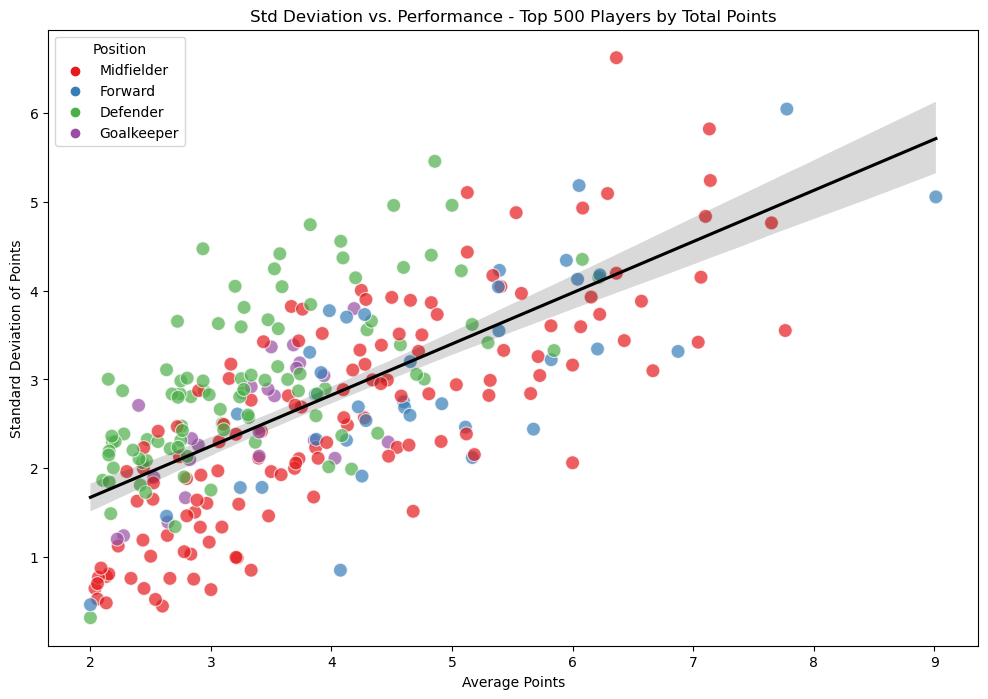

Observe a weak positive correlation between average points and standard deviation. I.e. more volatile players seems to score higher.
This is actually another reason/ argument against our MACI/VACI/DDACI/DDAVACI metrics. They penalise high std_deviation, even though it is correlated with high average points.


In [21]:
def scatter_plot_top_players(player_data, title_base, top_n=0, min_appearances=0, min_avg_points=0):
    plt.figure(figsize=(12, 8))

    # Filter data based on min appearances and min average points
    filtered_data = player_data[(player_data['appearances'] >= min_appearances) & 
                                (player_data['average_points'] >= min_avg_points)]

    # If top_n is specified, further filter to show only the top N players based on total points
    if top_n > 0:
        filtered_data = filtered_data.sort_values(by='total_points', ascending=False).head(top_n)
        title = f"{title_base} - Top {top_n} Players by Total Points"
    else:
        title = f"{title_base} - All Players"

    # Create scatter plot
    scatter = sns.scatterplot(data=filtered_data, x='average_points', y='std_dev_points', hue='position', 
                              alpha=0.7, edgecolor='w', palette='Set1', s=100)  # Uniform size for all markers
    # Add line of best fit
    sns.regplot(data=filtered_data, x='average_points', y='std_dev_points', scatter=False, color='black')

    # Calculate and print the correlation
    correlation = filtered_data['average_points'].corr(filtered_data['std_dev_points'])
    print(f"Correlation between Average Points and Standard Deviation of Points: {correlation:.2f}")

    plt.legend(title="Position", loc='upper left')
    plt.title(title)
    plt.xlabel("Average Points")
    plt.ylabel("Standard Deviation of Points")
    plt.show()

# Example Usage
scatter_plot_top_players(player_stats, "Std Deviation vs. Performance", top_n=500, min_appearances=5, min_avg_points=2)
print("Observe a weak positive correlation between average points and standard deviation. I.e. more volatile players seems to score higher.")
print("This is actually another reason/ argument against our MACI/VACI/DDACI/DDAVACI metrics. They penalise high std_deviation, even though it is correlated with high average points.")

Correlation between Average Points and Downside Deviation of Points: 0.67


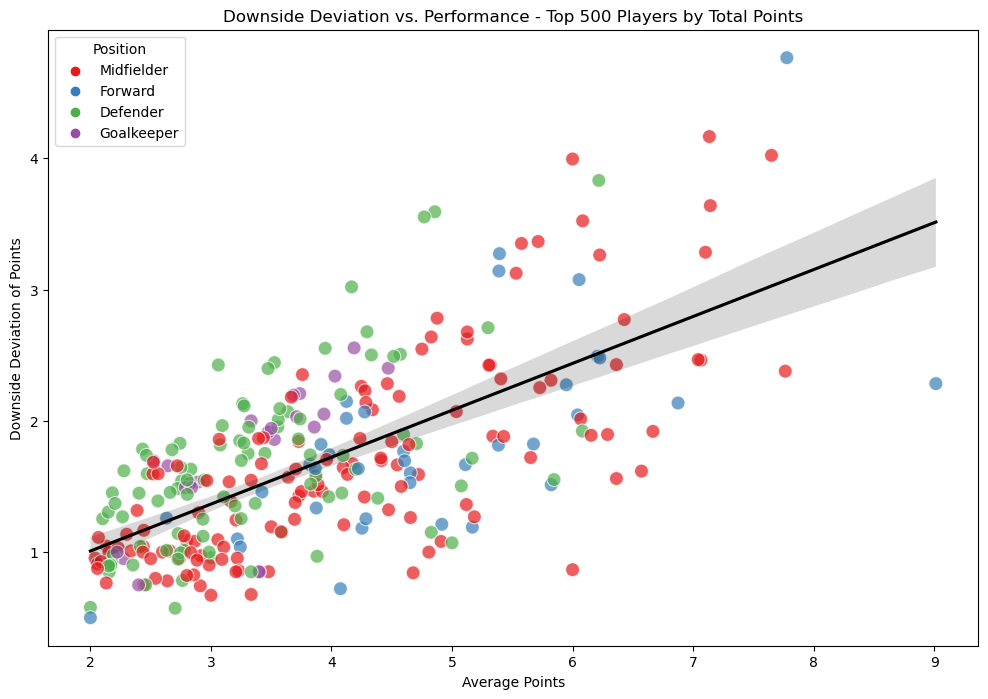

Similar relationship as std_deviation. Again, doesn't make perfect sense to penalise players with high downside deviation if it is positively correlated with donwisde deviation.


In [22]:
def scatter_plot_top_players(player_data, title_base, top_n=0, min_appearances=0, min_avg_points=0):
    plt.figure(figsize=(12, 8))

    # Filter data based on min appearances and min average points
    filtered_data = player_data[(player_data['appearances'] >= min_appearances) & 
                                (player_data['average_points'] >= min_avg_points)]

    # If top_n is specified, further filter to show only the top N players based on total points
    if top_n > 0:
        filtered_data = filtered_data.sort_values(by='total_points', ascending=False).head(top_n)
        title = f"{title_base} - Top {top_n} Players by Total Points"
    else:
        title = f"{title_base} - All Players"

    # Create scatter plot
    scatter = sns.scatterplot(data=filtered_data, x='average_points', y='downside_deviation', hue='position', 
                              alpha=0.7, edgecolor='w', palette='Set1', s=100)  # Uniform size for all markers

    # Add line of best fit
    sns.regplot(data=filtered_data, x='average_points', y='downside_deviation', scatter=False, color='black')

    # Calculate and print the correlation
    correlation = filtered_data['average_points'].corr(filtered_data['downside_deviation'])
    print(f"Correlation between Average Points and Downside Deviation of Points: {correlation:.2f}")

    plt.legend(title="Position", loc='upper left')
    plt.title(title)
    plt.xlabel("Average Points")
    plt.ylabel("Downside Deviation of Points")
    plt.show()

# Example Usage
scatter_plot_top_players(player_stats, "Downside Deviation vs. Performance", top_n=500, min_appearances=5, min_avg_points=2)
print("Similar relationship as std_deviation. Again, doesn't make perfect sense to penalise players with high downside deviation if it is positively correlated with donwisde deviation.")

Correlation between Average Points and Penalty Factor: 0.49


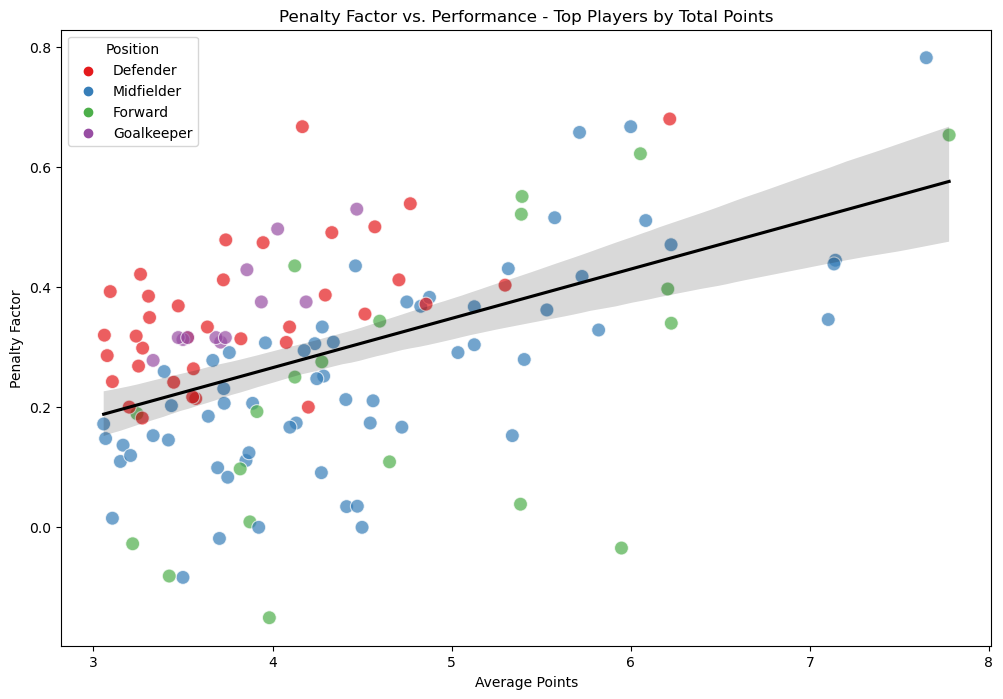

Here we have a positive correlation between penalty factor and performance too. But recall, higher penalty factor = 1- PU/appearances, so a higher penalty factor is associated with higher consistency.This is exactly why we prefer our Alpha Metric, it rewards high penalty factors i.e. more consistent performers.


In [23]:
def scatter_plot_top_players(player_data, title_base, top_n=0, min_appearances=0, min_avg_points=0):
    plt.figure(figsize=(12, 8))

    # Filter data based on min appearances and min average points
    filtered_data = player_data[(player_data['appearances'] >= min_appearances) & 
                                (player_data['average_points'] >= min_avg_points)]

    # If top_n is specified, further filter to show only the top N players based on total points
    if top_n > 0:
        filtered_data = filtered_data.sort_values(by='total_points', ascending=False).head(top_n)
        title = f"{title_base} - Top Players by Total Points"
    else:
        title = f"{title_base} - Top Players by Total Points"

    # Create scatter plot
    scatter = sns.scatterplot(data=filtered_data, x='average_points', y='penalty_factor', hue='position', 
                              alpha=0.7, edgecolor='w', palette='Set1', s=100)  # Uniform size for all markers

    # Add line of best fit
    sns.regplot(data=filtered_data, x='average_points', y='penalty_factor', scatter=False, color='black')

    # Calculate and print the correlation
    correlation = filtered_data['average_points'].corr(filtered_data['penalty_factor'])
    print(f"Correlation between Average Points and Penalty Factor: {correlation:.2f}")

    plt.legend(title="Position", loc='upper left')
    plt.title(title)
    plt.xlabel("Average Points")
    plt.ylabel("Penalty Factor")
    plt.show()

# Example Usage
scatter_plot_top_players(player_stats, "Penalty Factor vs. Performance", min_appearances=5, min_avg_points=2)
print("Here we have a positive correlation between penalty factor and performance too. But recall, higher penalty factor = 1- PU/appearances, so a higher penalty factor is associated with higher consistency.This is exactly why we prefer our Alpha Metric, it rewards high penalty factors i.e. more consistent performers.")

### Highlighting Top Performers vs the penalty_factor:

### Plotting vs Alpha Penalty Factor

Pick the top performers you want to plot by setting group_selected.

In [24]:
# set to maci, vaci, ddaci, ddavaci or alpha.

group_selected = 'alpha'

Correlation between Average Points and Penalty Factor: 0.45


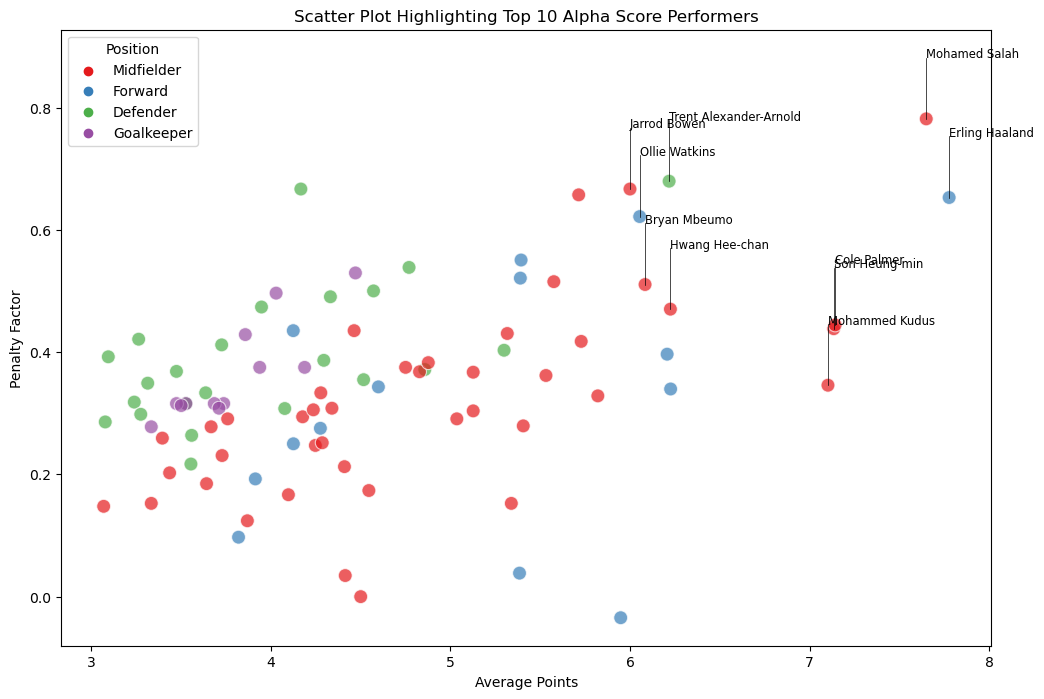

In [25]:
def scatter_plot_with_labels(player_data, top_n=0, min_appearances=0, min_avg_points=0, group='consistent'):
    plt.figure(figsize=(12, 8))

    # Filter data based on min appearances and min average points
    filtered_data = player_data[(player_data['appearances'] >= min_appearances) & 
                                (player_data['average_points'] >= min_avg_points)]

    # If top_n is specified, further filter to show only the top N players based on total points
    if top_n > 0:
        filtered_data = filtered_data.sort_values(by='total_points', ascending=False).head(top_n)

    # Selecting the group and setting the label dynamically
    if group == 'maci':
        selected_group = top_performers_adjusted.head(10)
        group_label = "Consistent Performers"
    elif group == 'vaci':
        selected_group = top_value_players_revised.head(10)
        group_label = "VACI Performers"
    elif group == 'scoring':
        selected_group = player_stats.sort_values(by='total_points', ascending=False).head(10)
        group_label = "Highest Scoring Players"
    elif group == 'ddaci':
        selected_group = top_performers_ddaci.head(10)
        group_label = "DDACI Performers"
    elif group == 'ddavaci':
        selected_group = top_value_players_ddavaci.head(10)
        group_label = "DDAVACI Performers"
    elif group == 'alpha':
        selected_group = top_value_players_alpha_metric.head(10)
        group_label = "Alpha Score Performers"

    # Creating the scatter plot
    scatter = sns.scatterplot(data=filtered_data, x='average_points', y='penalty_factor', hue='position',
                              alpha=0.7, edgecolor='w', palette='Set1', s=100)

    # Calculate and print the correlation
    correlation = filtered_data['average_points'].corr(filtered_data['penalty_factor'])
    print(f"Correlation between Average Points and Penalty Factor: {correlation:.2f}")

    # Labeling top players from the specified group
    for _, row in selected_group.iterrows():
        player = filtered_data[filtered_data['player_id'] == row['player_id']]
        if not player.empty:
            plt.text(player['average_points'].values[0], player['penalty_factor'].values[0] + 0.1, 
                     f"{row['first_name']} {row['second_name']}", 
                     horizontalalignment='left', size='small', color='black')
            plt.plot([player['average_points'].values[0], player['average_points'].values[0]], 
                     [player['penalty_factor'].values[0], player['penalty_factor'].values[0] + 0.1], 
                     color='black', lw=0.5)

    plt.legend(title="Position", loc='upper left')
    plt.title(f"Scatter Plot Highlighting Top 10 {group_label}")
    plt.xlabel("Average Points")
    plt.ylabel("Penalty Factor")
    plt.show()

# Example Usage
# Specify the group to plot and label: 'consistent', 'vaci', or 'scoring'
scatter_plot_with_labels(player_stats, top_n=100, min_appearances=5, min_avg_points=2, group=group_selected)

### Line Graphs for Performance Trends


Some simple line graph visualisations to plot the top N players performance, week by week, according to each metric.

In [26]:
# you can set top_n here:

top_n = 5

# horizontal dotted line corresponds to minimum threshold X =4, you can adjust this too if you want:

custom_y = 4 

In [27]:
# Concatenate all non-empty gameweek dataframes
all_gameweeks_df = pd.concat([df for df in loaded_gameweek_dataframes.values() if not df.empty])

# Ensure that the dataframe is sorted by gameweek for each player
all_gameweeks_df.sort_values(by=['player_id', 'round'], inplace=True)


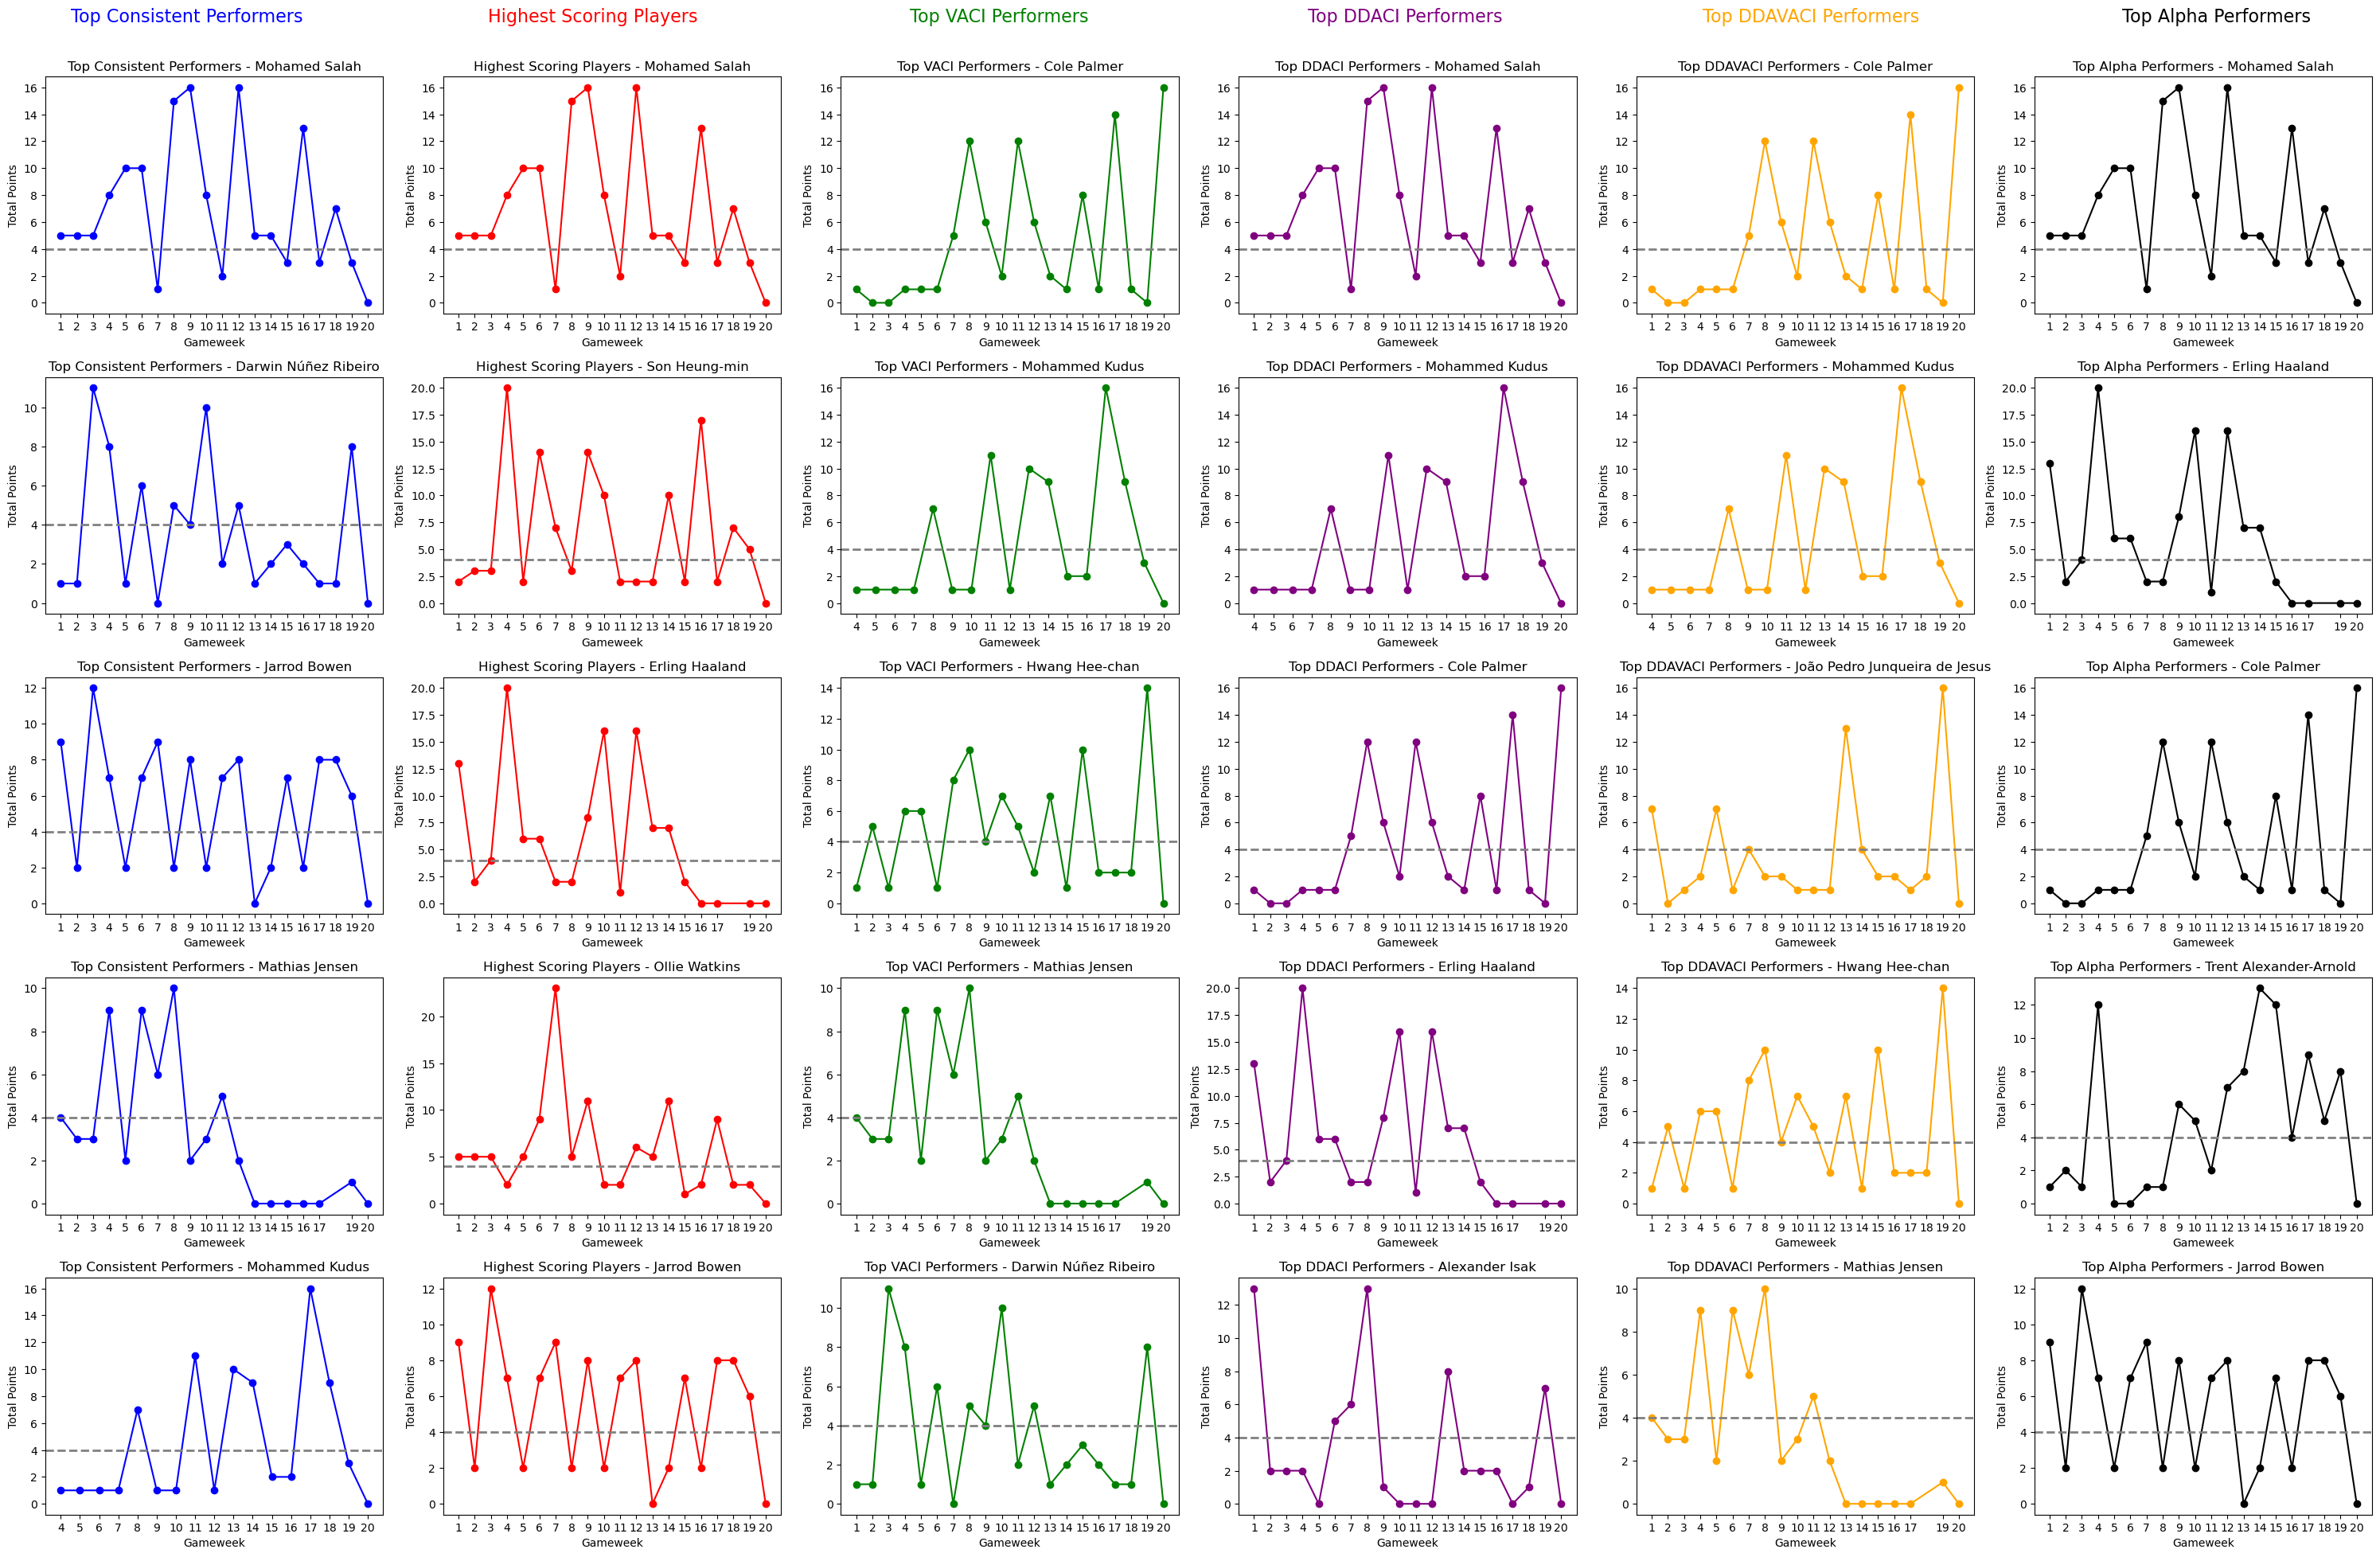

In [28]:
def plot_grouped_performance_trends(all_gameweeks_df, group1_df, group2_df, group3_df, group4_df, group5_df, group6_df, top_n, group_titles, colors, custom_y):
    fig, axes = plt.subplots(nrows=top_n, ncols=6, figsize=(30, top_n * 4))

    # Groups: Top Consistent, Highest Scoring, Top VACI, Top DDACI, and Top DDAVACI
    groups = [group1_df, group2_df, group3_df, group4_df, group5_df, group6_df]

    for i in range(top_n):
        for j, group_df in enumerate(groups):
            if i < len(group_df):
                player_row = group_df.iloc[i]
                player_id = player_row['player_id']
                player_data = all_gameweeks_df[all_gameweeks_df['player_id'] == player_id]
                player_name = f"{player_row['first_name']} {player_row['second_name']}"
                
                # Use the pre-calculated average points for this player
                average_points = player_row['average_points']

                axes[i, j].plot(player_data['round'], player_data['total_points'], marker='o', color=colors[j])
                axes[i, j].axhline(y=custom_y, color='gray', linestyle='--', lw=2)  # Horizontal line for average points
                axes[i, j].set_title(f"{group_titles[j]} - {player_name}")
                axes[i, j].set_xlabel("Gameweek")
                axes[i, j].set_ylabel("Total Points")
                axes[i, j].set_xticks(player_data['round'])
            else:
                axes[i, j].axis('off')

    for j, title in enumerate(group_titles):
        plt.figtext(0.17 * j + 0.08, 0.97, title, ha='center', va='center', fontsize=16, color=colors[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage with the same parameters as before


# Example Usage
group_titles = ["Top Consistent Performers", "Highest Scoring Players", "Top VACI Performers", "Top DDACI Performers", "Top DDAVACI Performers", "Top Alpha Performers"]
colors = ["blue", "red", "green", "purple", "orange", "black"]


# DataFrames for each group
top_consistent_players = top_performers_adjusted.head(top_n)
top_scoring_players = player_stats.sort_values(by='total_points', ascending=False).head(top_n)
top_vaci_players = top_value_players_revised.head(top_n)
top_ddaci_players = top_performers_ddaci.head(top_n)
top_ddavaci_players = top_value_players_ddavaci.head(top_n)
top_alpha_players = top_value_players_alpha_metric.head(top_n)

plot_grouped_performance_trends(all_gameweeks_df, top_consistent_players, top_scoring_players, top_vaci_players, top_ddaci_players, top_ddavaci_players, top_alpha_players, top_n, group_titles, colors, custom_y)


Some brief comments:

I did the checks for you (but feel free to count), below is the total sum across all gameweeks (for the top 5 players across each metric) where the players scored atleast 4 points.

- MACI: 43
- VACI: 36
- DDACI: 43
- DDAVACI: 33
- alpha: 55
- Top Points Scorers: 56

Unsuprisingly alpha metric performs better than all other metrics and almost as good as simply looking at the top scorers (despite taking into account pricing).


### Step 4: K-means clustering

1) As we discussed earlier, there are some inate biases in the players our metrics produce depending on how we paramaterise our functions. I.e. we can choose to give a very large weighting to price, which would penalise expensive players, or we could do the opposite.

2) I think exploring the best way to paramaterise this metric would be an interesting follow-up project, but an alternative and perhaps simpler way to deal with this problem is to use K-means clustering.

3) K-means clustering will help us to segregate our players into different groups or "clusters" which exhibit similar characteristics (i.e. expensive, high average points players). Then comparing comparing metrics across players with similar profiles might become easier to draw conclusions from. 

4) This ability to be analysing group by group also creates a type of scouting tool for us. I.e. do you need a cheap player with consistent returns, no problem look at cluster X. Or do you need a premium player with high points output since your current player is injured, no problem - look at cluster Y.

Let's get started...

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Explanation of selected features:

features = ['average_points', 'penalty_factor', 'total_goals', 'total_assists', 'total_clean_sheets', 'latest_price', 'appearances']

* average_points: distinguishing between high and low scorers is obviously useful.
* penalty_factor: as you should recall, this is our preferred metric for consistency (remember higher = better). 
* total_goals, total_assists, total_clean_sheets: while these features are correleated with average_points, I think it they might be useful in identifying different types of players, which could provide interesting insights i.e. goalscorers, playmakers, players in solid defensive teams.
* latest_price: to distinguish between high value and low value players
* appearances: to distinguish between regular and squad rotation players etc.

In [30]:
# Feature selection
features = ['average_points', 'penalty_factor', 'total_goals', 'total_assists', 'total_clean_sheets', 'latest_price', 'appearances']
cluster_data = player_stats[features]

# Remove players with NaN values in any of the selected features
cluster_data_cleaned = cluster_data.dropna()
cluster_data_cleaned = cluster_data_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# Normalization
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data_cleaned)

# Convert scaled data back to a DataFrame for ease of use
cluster_data_df = pd.DataFrame(cluster_data_scaled, columns=features)


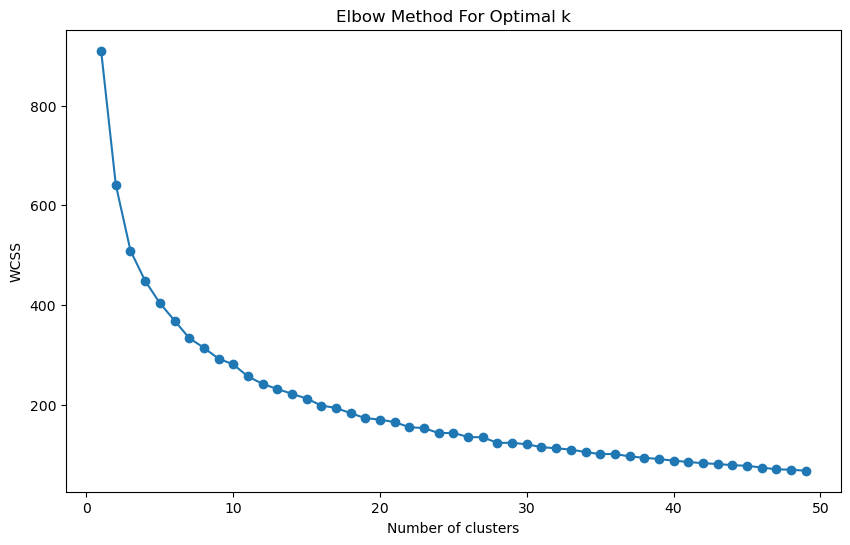

Elbow at approx k=10


In [31]:
# Determine the optimal number of clusters using the Elbow Method

wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=42)
    kmeans.fit(cluster_data_df)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print("Elbow at approx k=10")

In [32]:
# Applying K-means clustering for k=10 clusters
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_df)

# Adding the cluster labels to our data
cluster_data_cleaned['cluster'] = cluster_labels

# Analyzing Cluster Centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=features)

# Displaying the centroids
print("Cluster Centroids:")
display(centroid_df)

# Adding cluster information back to the original DataFrame
player_stats['cluster'] = cluster_data_cleaned['cluster']

# Now you can analyze each cluster in the context of your original data


Cluster Centroids:


,average_points,penalty_factor,total_goals,total_assists,total_clean_sheets,latest_price,appearances
0,-0.191649,0.038576,0.402517,0.284932,0.462390,0.205409,0.728334
1,-0.790304,0.149044,-0.807102,-0.630587,0.504603,-0.581707,1.092883
2,0.061023,-0.994765,0.066512,-0.233677,0.430731,0.208938,-0.883758
3,3.289854,2.476713,3.628168,1.712145,0.800091,5.175181,0.638572
4,0.465188,-0.540383,0.272188,0.571582,-1.698127,-0.065841,-0.616421
5,1.041150,1.122431,0.402517,1.890866,0.686442,1.029360,0.577444
6,0.054926,0.778369,-0.570298,-0.644416,0.757878,-0.467581,-0.325053
7,-0.899152,-1.088151,-0.314294,-0.325272,-0.813729,-0.536727,-0.008245
8,2.033054,1.044651,2.239346,0.201955,-0.381862,0.950169,-0.003625
9,-0.660143,-0.460673,-0.577125,-0.518290,-0.953139,-0.622887,-1.306807


### Non-standardised values: 
easier to contextualise certain features in a more familiar scale for FPL managers, e.g.  price always >0 easier to read.

In [33]:


# Get the centroids from the kmeans model
scaled_centroids = kmeans.cluster_centers_

# Inverse transform the centroids to get them back to the original scale
original_centroids = scaler.inverse_transform(scaled_centroids)

# Creating a DataFrame for the original centroids
original_centroid_df = pd.DataFrame(original_centroids, columns=features)

# Displaying the original centroids
print("Cluster Centroids in Original Scale:")
display(original_centroid_df)


Cluster Centroids in Original Scale:


,average_points,penalty_factor,total_goals,total_assists,total_clean_sheets,latest_price,appearances
0,4.111830,0.297677,4.000000,2.928571,4.928571,6.057143,16.592857
1,3.492422,0.316680,0.625000,0.958333,5.000000,4.862500,17.579167
2,4.373261,0.119915,3.062500,1.812500,4.875000,6.062500,12.231250
3,7.714026,0.717099,13.000000,6.000000,5.500000,13.600000,16.350000
4,4.791438,0.198081,3.636364,3.545455,1.272727,5.645455,12.954545
5,5.387367,0.484128,4.000000,6.384615,5.307692,7.307692,16.184615
6,4.366954,0.424940,1.285714,0.928571,5.428571,5.035714,13.742857
7,3.379800,0.103850,2.000000,1.615385,2.769231,4.930769,14.600000
8,6.413656,0.470748,9.125000,2.750000,3.500000,7.187500,14.612500
9,3.627095,0.211793,1.266667,1.200000,2.533333,4.800000,11.086667


Build a code to colour code the above results based on %ile. Red = low, green = high.

Note: red/low and green/high does NOT necessarily mean bad/good. You need to consider in the context of each feature.
I.e. high scoring clusters will be green in average_points which is "good"
but clusters with high price will also be green in latest_price, which is not necessarily "good"

In [34]:
# Define a function to color code the values based on percentiles
def color_code(val, feature):
    lowest_threshold = original_centroid_df[feature].quantile(0.20)
    low_threshold = original_centroid_df[feature].quantile(0.40)
    high_threshold = original_centroid_df[feature].quantile(0.60)
    highest_threshold = original_centroid_df[feature].quantile(0.80)
    
    color = 'green'  # default color
    if val <= lowest_threshold:
        color = 'red'  # lowest
    elif val <= low_threshold:
        color = '#ff6666'  # light red
    elif val <= high_threshold:
        color = 'yellow'  # average
    elif val <= highest_threshold:
        color = '#99ff99'  # light green
    else:
        color = 'green'  # highest

    return f'background-color: {color}'

# Apply color coding to the DataFrame
styled_df = original_centroid_df.style.apply(lambda x: [color_code(val, feature) for val, feature in zip(x, x.index)], axis=1)

# Display the styled DataFrame
styled_df


,average_points,penalty_factor,total_goals,total_assists,total_clean_sheets,latest_price,appearances
0,4.111830,0.297677,4.000000,2.928571,4.928571,6.057143,16.592857
1,3.492422,0.316680,0.625000,0.958333,5.000000,4.862500,17.579167
2,4.373261,0.119915,3.062500,1.812500,4.875000,6.062500,12.231250
3,7.714026,0.717099,13.000000,6.000000,5.500000,13.600000,16.350000
4,4.791438,0.198081,3.636364,3.545455,1.272727,5.645455,12.954545
5,5.387367,0.484128,4.000000,6.384615,5.307692,7.307692,16.184615
6,4.366954,0.424940,1.285714,0.928571,5.428571,5.035714,13.742857
7,3.379800,0.103850,2.000000,1.615385,2.769231,4.930769,14.600000
8,6.413656,0.470748,9.125000,2.750000,3.500000,7.187500,14.612500
9,3.627095,0.211793,1.266667,1.200000,2.533333,4.800000,11.086667


Build a code to filter the colour results about by clusters of specific interest.

In [35]:


# Assuming original_centroid_df and color_code function are already defined

# List of clusters to display, e.g., [1, 2, 5]
clusters_to_display = [0, 1, 3, 4, 5, 6, 8]

# Filter the DataFrame to show only selected clusters
filtered_centroid_df = original_centroid_df.loc[clusters_to_display]

# Apply color coding to the filtered DataFrame
styled_df = filtered_centroid_df.style.apply(lambda x: [color_code(val, feature) for val, feature in zip(x, x.index)], axis=1)

# Display the styled DataFrame
styled_df


,average_points,penalty_factor,total_goals,total_assists,total_clean_sheets,latest_price,appearances
0,4.111830,0.297677,4.000000,2.928571,4.928571,6.057143,16.592857
1,3.492422,0.316680,0.625000,0.958333,5.000000,4.862500,17.579167
3,7.714026,0.717099,13.000000,6.000000,5.500000,13.600000,16.350000
4,4.791438,0.198081,3.636364,3.545455,1.272727,5.645455,12.954545
5,5.387367,0.484128,4.000000,6.384615,5.307692,7.307692,16.184615
6,4.366954,0.424940,1.285714,0.928571,5.428571,5.035714,13.742857
8,6.413656,0.470748,9.125000,2.750000,3.500000,7.187500,14.612500


### My thoughts on each cluster:

* Cluster 0: Regular starters but low scoring, fairly cheap. Decent goal/assist contribution likely mostly strikers/ midfielders. Interesting for managers looking for cheap filler players in these positions. 

* Cluster 1: Similar to cluster 0 but lower scoring and cheaper. Decent clean sheets contribution, likely play for solid defensive teams. Defenders in this cluster might be interesting and cheap purchases.

* Cluster 2: Low appearances, inconsistent performers, and not too cheap either. Not interesting at all. 

* Cluster 3: Regular starters, premium pricing, and most consitent an dhigh scoring category. This is our "most premium players" cluster. 

* Cluster 4: Decent points contribution but not very consistent, explosive in certain gameweeks. Priced quite cheaply so they could be interesting differentials in gameweeks where we know they will play/ fixture list looks nice.

* Cluster 5: Regular starters, higher priced, and very consistently scoring cluster.  These will be a "premium players" cluster.

* Cluster 6: Fairly consistent returns, high clean sheets and cheap pricing => goalkeepers and defenders. Not the most regular starters, interesting if sure they will start regularly/ fixture list lines up well.

* Cluster 7: Lowest scorers and very inconsistent too. Cheap but not the cheapest. Honestly not interesting at all.

* Cluster 8: Higher scoring (mostly goal scoring), more consistent and cheaper than cluster 6. Likely well owned attacking players.

* Cluster 9: Low scoring, inconsistent, low appearances, no interest cluster.

### Some plots to visualise the clusters in two dimensions:

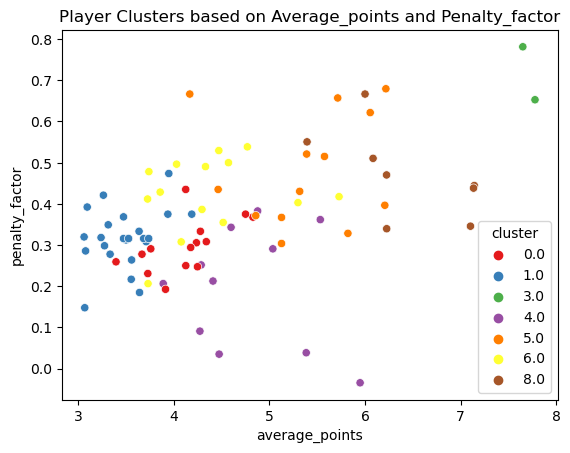

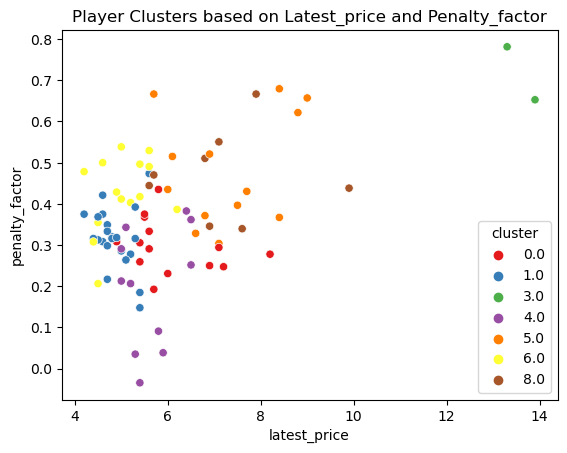

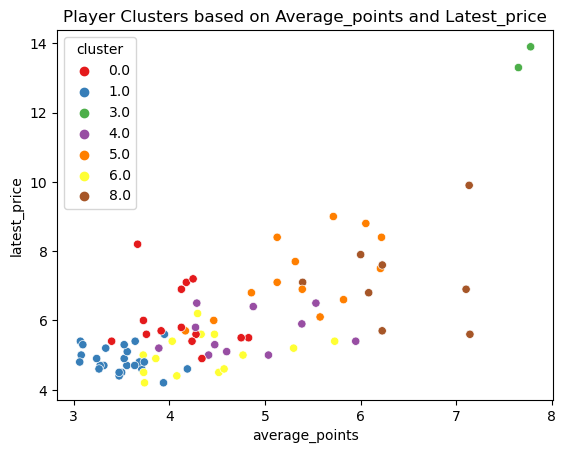

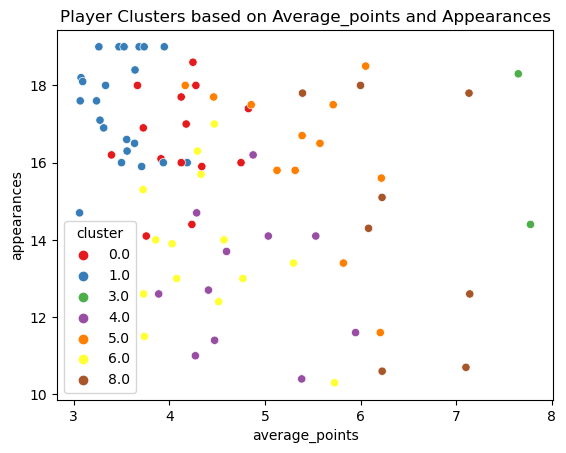

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_selected_clusters_scatter(player_stats_df, x_feature, y_feature, selected_clusters):
    # Filter the DataFrame based on the selected clusters
    filtered_data = player_stats_df[player_stats_df['cluster'].isin(selected_clusters)]

    # Create the scatter plot
    sns.scatterplot(data=filtered_data, x=x_feature, y=y_feature, hue='cluster', palette='Set1')
    plt.title(f'Player Clusters based on {x_feature.capitalize()} and {y_feature.capitalize()}')
    plt.show()

# Example Usage
# You can call this function with different features and cluster selections
plot_selected_clusters_scatter(player_stats, 'average_points', 'penalty_factor', [0, 1, 3, 4, 5, 6, 8])
plot_selected_clusters_scatter(player_stats, 'latest_price', 'penalty_factor', [0, 1, 3, 4, 5, 6, 8])
plot_selected_clusters_scatter(player_stats, 'average_points', 'latest_price', [0, 1, 3, 4, 5, 6, 8])
plot_selected_clusters_scatter(player_stats, 'average_points', 'appearances', [0, 1, 3, 4, 5, 6, 8])


### a nice pairplot for quick view of clusters relationshiops across all features:

/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning

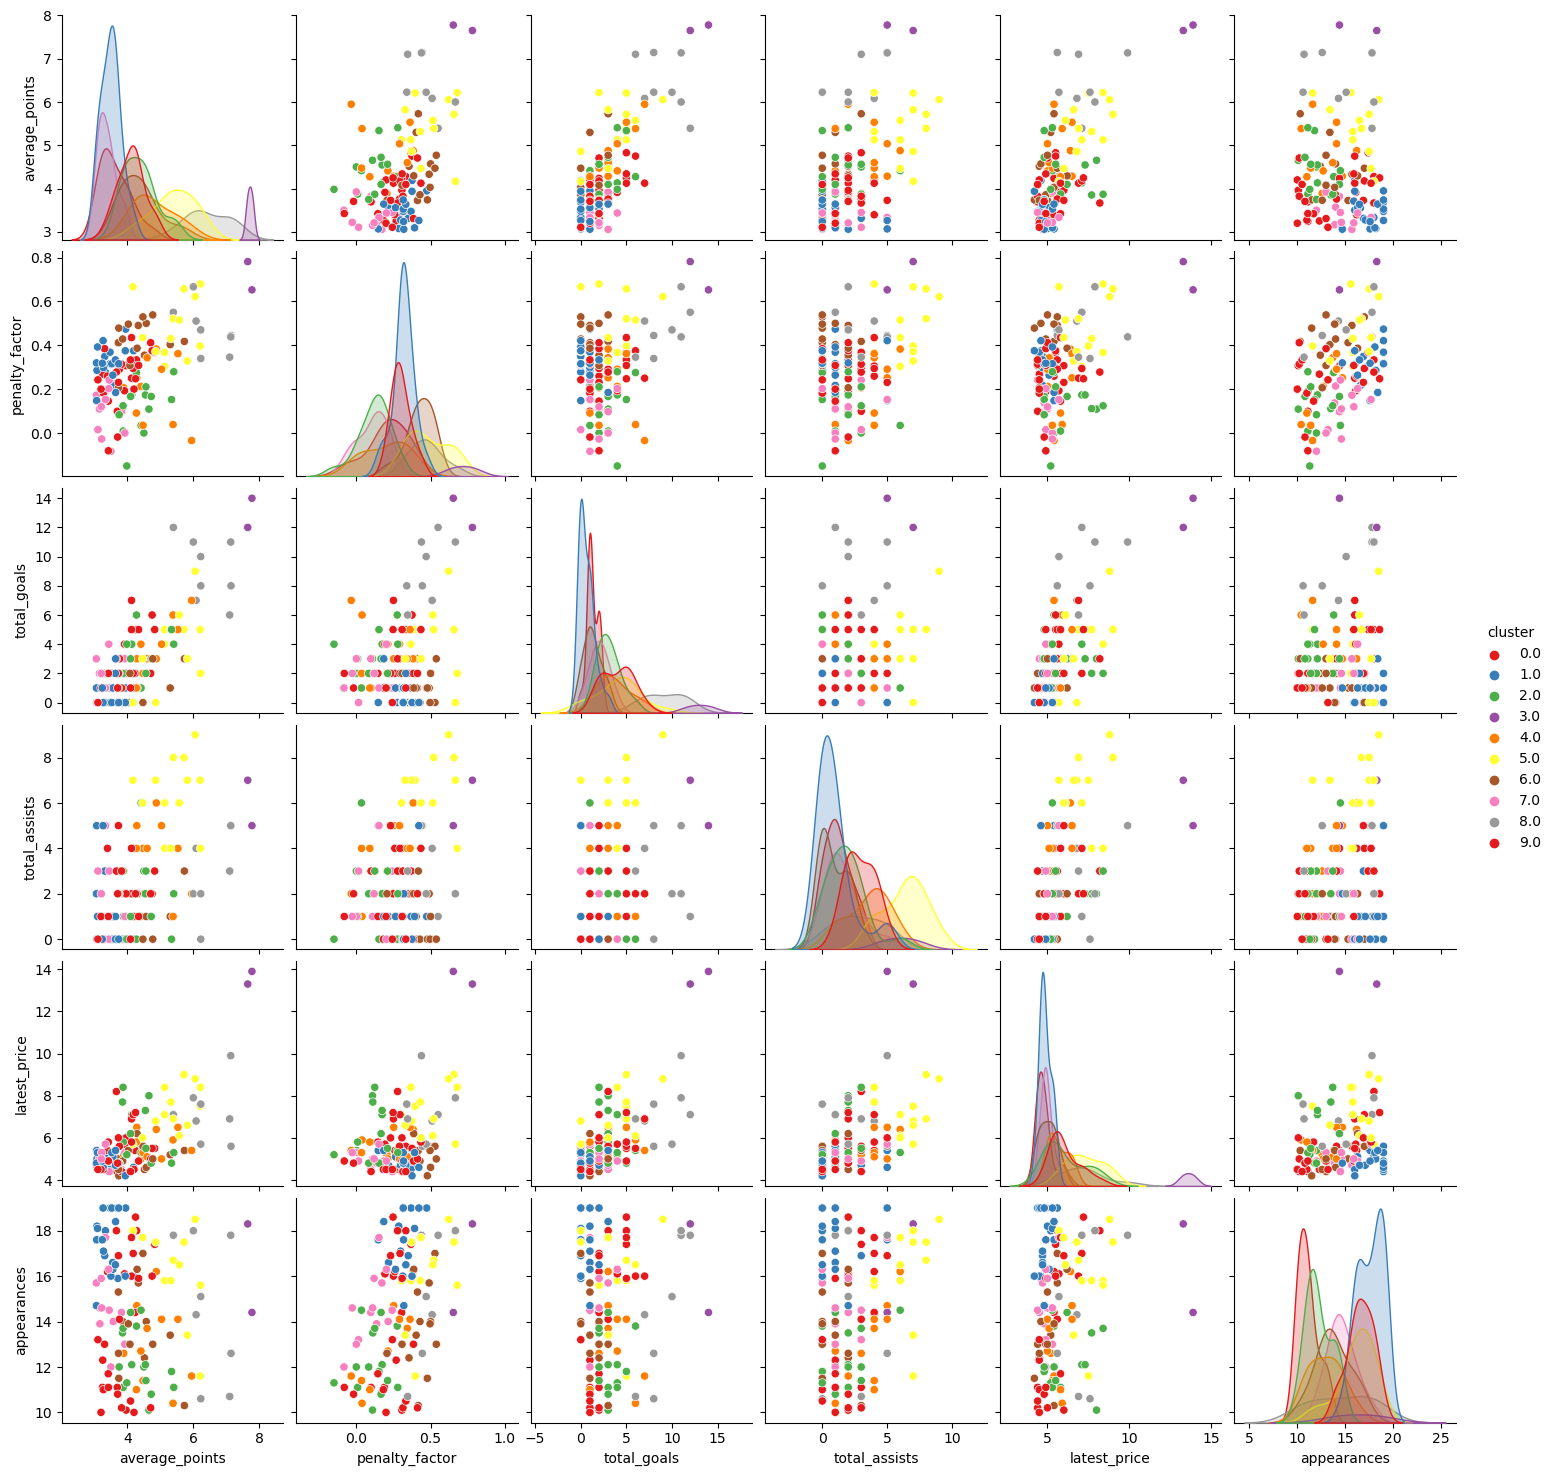

In [37]:
sns.pairplot(player_stats, vars=['average_points', 'penalty_factor', 'total_goals', 'total_assists', 'latest_price', 'appearances'], hue='cluster', palette='Set1')
plt.show()


### Display specific Cluster

In [45]:
import pandas as pd

def display_cluster_data(cluster_number, player_stats, centroid_df):
    """
    Display the players in a specified cluster and the statistics of all clusters with the specified cluster highlighted in bold and red.

    Args:
    - cluster_number: The cluster number to display the players from.
    - player_stats: DataFrame containing players and their cluster labels.
    - centroid_df: DataFrame containing the centroids of all clusters.
    """

    # Display players in the specified cluster
    print(f"Players in Cluster {cluster_number}:")
    display(player_stats[player_stats['cluster'] == cluster_number])

    # Display the centroids of all clusters with the selected cluster highlighted
    print("\nCluster Centroids:")
    centroid_df_styled = centroid_df.style.apply(
        lambda x: ['color: red; font-weight: bold' if x.name == cluster_number else '' for i in x], axis=1)
    display(centroid_df_styled)

# Example usage
cluster_number = 3  # Set the cluster number you want to view
display_cluster_data(cluster_number, player_stats, original_centroid_df)


Players in Cluster 3:


,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,appearances,average_points,average_bonus,std_dev_points,latest_price,downside_deviation,penalty_factor,Alpha_Metric,cluster
307,308,Mohamed,Salah,Midfielder,140,12,7,7,18,1650,18.3,7.650273,0.983607,4.763408,13.3,4.022663,0.781421,95.937846,3.0
354,355,Erling,Haaland,Forward,112,14,5,4,15,1294,14.4,7.777778,1.041667,6.045857,13.9,4.766719,0.652778,82.380525,3.0



Cluster Centroids:


,average_points,penalty_factor,total_goals,total_assists,total_clean_sheets,latest_price,appearances
0,4.111830,0.297677,4.000000,2.928571,4.928571,6.057143,16.592857
1,3.492422,0.316680,0.625000,0.958333,5.000000,4.862500,17.579167
2,4.373261,0.119915,3.062500,1.812500,4.875000,6.062500,12.231250
3,7.714026,0.717099,13.000000,6.000000,5.500000,13.600000,16.350000
4,4.791438,0.198081,3.636364,3.545455,1.272727,5.645455,12.954545
5,5.387367,0.484128,4.000000,6.384615,5.307692,7.307692,16.184615
6,4.366954,0.424940,1.285714,0.928571,5.428571,5.035714,13.742857
7,3.379800,0.103850,2.000000,1.615385,2.769231,4.930769,14.600000
8,6.413656,0.470748,9.125000,2.750000,3.500000,7.187500,14.612500
9,3.627095,0.211793,1.266667,1.200000,2.533333,4.800000,11.086667


### Search Specific Player to find their cluster

In [44]:
def find_player_cluster(player_stats_df, search_term):
    # Convert search_term to string to handle numerical IDs
    search_term = str(search_term).lower()

    # Filter DataFrame based on search term matching ID, first name, or second name
    filtered_df = player_stats_df[
        (player_stats_df['player_id'].astype(str) == search_term) |
        (player_stats_df['first_name'].str.lower().str.contains(search_term)) |
        (player_stats_df['second_name'].str.lower().str.contains(search_term))
    ][['player_id', 'first_name', 'second_name', 'cluster']]

    if filtered_df.empty:
        return f"No player found for search term: {search_term}"
    else:
        return filtered_df

# Example usage:
# Replace 'search_term' with the player ID, first name, or second name you're searching for
search_term = 'Salah'
display(find_player_cluster(player_stats, search_term))


,player_id,first_name,second_name,cluster
307,308,Mohamed,Salah,3.0


# !!! SCOUTING TOOL !!!

Our scouting tool lets us search by a particular cluster and filter by different metrics. 

Consider my current real life scenario. I own Salah and Son, both are going to Afcon/ Asia Cup and I want a replacement for them for the next month.

I have 23.1£mio to spend on two new premium attack players. But I want to leave some cash in my balance to make future transfers easier, if needed. As such cluster 8 is the most natural choice and cluster 5 possibly too.

recall their descriptions:

* Cluster 5: Regular starters, higher priced, and very consistently scoring cluster.  These will be a "premium players" cluster.

* Cluster 8: Higher scoring (mostly goal scoring), more consistent and cheaper than cluster 6. Likely well owned attacking players.

### Display all players in a particular cluster and sort by desired metric.

In [87]:
# Choose which cluster of players to display:
cluster_numbers = [5, 8]  
# choose metric to sort by .i.e. "MACI", "VACI", "DDACI", "DDAVACI", "Alpha_Metric_y" or "combined_metrics"

sort_by = 'Alpha_Metric_y'


note: Alpha_Metric_y is just our Alpha Metric and combined_metrics is an average of MACI/ VACI/ DDACI and DDAVACI

In [88]:
def display_cluster_data(cluster_numbers, player_stats, centroid_df, sort_by=None):
    # Merge MACI, VACI, DDACI, DDAVACI, Alpha scores with player_stats
    index_scores = [maci_scores, vaci_scores, filtered_player_stats_ddaci, filtered_player_stats_ddavaci, alpha_scores]
    for df in index_scores:
        player_stats = player_stats.merge(df[['player_id', df.columns[-1]]], on='player_id', how='left')

    # Calculate the combined metric
    player_stats['combined_metrics'] = player_stats[['MACI', 'VACI', 'DDACI', 'DDAVACI']].mean(axis=1)

    # Filter players in the specified clusters
    cluster_players = player_stats[player_stats['cluster'].isin(cluster_numbers)]

    # Sort players based on the specified column, if provided
    if sort_by is not None and sort_by in cluster_players.columns:
        cluster_players = cluster_players.sort_values(by=sort_by, ascending=False)

    # Display players in the specified clusters
    print(f"Players in Clusters {', '.join(map(str, cluster_numbers))}:")
    display(cluster_players)

    # Display the centroids of all clusters with the selected clusters highlighted
    print("\nCluster Centroids:")
    centroid_df_styled = centroid_df.style.apply(
        lambda x: ['color: red; font-weight: bold' if x.name in cluster_numbers else '' for i in x], axis=1)
    display(centroid_df_styled)

display_cluster_data(cluster_numbers, player_stats, original_centroid_df, sort_by=sort_by)



Players in Clusters 5, 8:


,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,...,downside_deviation,penalty_factor,Alpha_Metric_x,cluster,MACI,VACI,DDACI,DDAVACI,Alpha_Metric_y,combined_metrics
361,362,Cole,Palmer,Midfielder,90,8,5,3,8,1137,...,3.640055,0.444444,68.444627,8.0,3.120003,9.417441,4.643399,14.015672,68.444627,7.799129
289,290,Trent,Alexander-Arnold,Defender,97,2,4,7,18,1408,...,3.831775,0.679487,56.361563,5.0,3.052356,6.548512,3.973566,8.524874,56.361563,5.524827
525,526,Jarrod,Bowen,Midfielder,108,11,2,4,8,1617,...,3.994997,0.666667,51.232901,8.0,3.374048,7.202594,3.781340,8.072043,51.232901,5.607506
515,516,Son,Heung-min,Midfielder,127,11,5,6,16,1600,...,4.166033,0.438202,50.583416,8.0,2.956995,6.705278,4.434141,10.054850,50.583416,6.037816
556,557,Hwang,Hee-chan,Midfielder,94,10,2,1,10,1356,...,3.263434,0.470199,47.511276,8.0,3.221613,8.400146,4.196874,10.943077,47.511276,6.690428
687,689,Mohammed,Kudus,Midfielder,76,6,3,3,11,961,...,3.284554,0.345794,47.171843,8.0,3.229430,8.732350,4.778273,12.920409,47.171843,7.415115
59,60,Ollie,Watkins,Forward,112,9,9,4,14,1669,...,3.075711,0.621622,46.496864,5.0,2.658890,5.426318,4.162917,8.495770,46.496864,5.185974
107,108,Bryan,Mbeumo,Midfielder,87,7,4,3,9,1286,...,3.523708,0.510490,44.084103,8.0,2.739794,6.392145,3.998065,9.327788,44.084103,5.614448
18,19,Bukayo,Saka,Midfielder,100,5,8,6,11,1573,...,3.366502,0.657143,40.871859,5.0,3.165835,6.030162,3.812727,7.262337,40.871859,5.067765
411,412,Anthony,Gordon,Midfielder,92,6,6,8,8,1486,...,3.351526,0.515152,36.156111,5.0,2.798550,6.317890,3.725830,8.411278,36.156111,5.313387



Cluster Centroids:


,average_points,penalty_factor,total_goals,total_assists,total_clean_sheets,latest_price,appearances
0,4.111830,0.297677,4.000000,2.928571,4.928571,6.057143,16.592857
1,3.492422,0.316680,0.625000,0.958333,5.000000,4.862500,17.579167
2,4.373261,0.119915,3.062500,1.812500,4.875000,6.062500,12.231250
3,7.714026,0.717099,13.000000,6.000000,5.500000,13.600000,16.350000
4,4.791438,0.198081,3.636364,3.545455,1.272727,5.645455,12.954545
5,5.387367,0.484128,4.000000,6.384615,5.307692,7.307692,16.184615
6,4.366954,0.424940,1.285714,0.928571,5.428571,5.035714,13.742857
7,3.379800,0.103850,2.000000,1.615385,2.769231,4.930769,14.600000
8,6.413656,0.470748,9.125000,2.750000,3.500000,7.187500,14.612500
9,3.627095,0.211793,1.266667,1.200000,2.533333,4.800000,11.086667


Using this Scouting tool I have several very interesting options now to replace Son/Salah:

- Cole Palmer
- Bowen
- Watkins
- Mbuemo
- Saka
- Gordon
- Nunez

Cole Palmer is super cheap, not in my team and top ranking across multiple metrics, so he seems like a very good pick.

I also am intrigued by Nunez as a replacement for Salah. He scores suprisingly well (despite certain rhetoric) and with Salah away in Afcon has a nice chance of becoming more consistent in a strong Liverpool side.


### Code to search for particular player to find their cluster and %ile rank according to each metric we built.

In [91]:
#search by Surname, FirstName or partial name
search_term = 'Darwi'

In [92]:
# Joining the scores with the player_stats DataFrame
df = player_stats
df = df.merge(maci_scores[['player_id', 'MACI']], on='player_id', how='left')
df = df.merge(vaci_scores[['player_id', 'VACI']], on='player_id', how='left')
df = df.merge(filtered_player_stats_ddaci[['player_id', 'DDACI']], on='player_id', how='left')
df = df.merge(filtered_player_stats_ddavaci[['player_id', 'DDAVACI']], on='player_id', how='left')
df = df.merge(alpha_scores[['player_id', 'Alpha_Metric']], on='player_id', how='left')



# Calculating percentile ranks
df['MACI_percentile'] = df['MACI'].rank(pct=True)
df['VACI_percentile'] = df['VACI'].rank(pct=True)
df['DDACI_percentile'] = df['DDACI'].rank(pct=True)
df['DDAVACI_percentile'] = df['DDAVACI'].rank(pct=True)
df['alpha_percentile'] = df['Alpha_Metric_y'].rank(pct=True)

# Calculate combined_metric as the mean of the four metrics
df['combined_metric'] = df[['MACI', 'VACI', 'DDACI', 'DDAVACI']].mean(axis=1)

# Calculate combined_metric_percentile as a percentage with one decimal place
df['combined_metric_percentile'] = df['combined_metric'].rank(pct=True)

def find_player_cluster(df, search_term):
    search_term = str(search_term).lower()

    # Filter DataFrame based on search term
    filtered_df = df[
        (df['player_id'].astype(str) == search_term) |
        (df['first_name'].str.lower().str.contains(search_term)) |
        (df['second_name'].str.lower().str.contains(search_term))
    ][['player_id', 'first_name', 'second_name', 'latest_price','cluster', 'MACI', 'VACI', 'DDACI', 'DDAVACI', 'Alpha_Metric_y', 'MACI_percentile', 'VACI_percentile', 'DDACI_percentile', 'DDAVACI_percentile', 'combined_metric_percentile', 'alpha_percentile']]

    if filtered_df.empty:
        return f"No player found for search term: {search_term}"
    else:
        # Convert percentiles to percentage format
        for col in ['MACI_percentile', 'VACI_percentile', 'DDACI_percentile', 'DDAVACI_percentile', 'combined_metric_percentile', 'alpha_percentile']:
            filtered_df[col] = (filtered_df[col] * 100).round(1).astype(str) + '%'
        return filtered_df

display(find_player_cluster(df, search_term))


,player_id,first_name,second_name,latest_price,cluster,MACI,VACI,DDACI,DDAVACI,Alpha_Metric_y,MACI_percentile,VACI_percentile,DDACI_percentile,DDAVACI_percentile,combined_metric_percentile,alpha_percentile
292,293,Darwin,Núñez Ribeiro,7.5,5.0,3.394676,7.693823,4.578177,10.376155,34.625235,99.2%,96.9%,96.2%,94.6%,96.2%,90.8%
